In [1]:
%matplotlib nbagg
# %matplotlib widget
from matplotlib import interactive
interactive(True)
import time
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
import astropy.constants
from astropy.io import ascii

In [2]:
dir='/Users/ebordier/TRIPLES/'

In [3]:
database=ascii.read(dir+'SMASH_2.dat')

In [4]:
# database

In [5]:
pionier_data=np.array(database['ID'][np.where(database['instru']=='PIO')])
# database[np.where(database['instru']=='PIO')]

In [6]:
pionier_data_unique=np.unique(pionier_data)
print(len(pionier_data_unique))

52


In [7]:
print(len(np.unique(database['ID'])))
# print(*pionier_data_unique,sep = "\n")

174


In [8]:
notes=ascii.read(dir+'notes_smash.dat')
notes
number_pio=np.where(notes['PIO']==1)[0]
print(len(number_pio))

27


In [9]:
triples_pionier=ascii.read(dir+'TRIPLES.dat')

In [10]:
#REMOVE ROW 94!! (2 pionier companions)
triples_pionier.show_in_notebook()
# print(np.where(triples_pionier['Target']=='HD75759'))
# print(18.9+9.4)

In [11]:
# triples_pionier['Triple'][42]='N'
# triples_pionier['Period (d)'][42]=25.47
# # # triples_pionier['Mass_prim(Msun)'][22]=62.2
# # # triples_pionier['Mass_comp(Msun)'][23]=33.4
# # # triples_pionier['Mc/Mp'][23]=0.53
# triples_pionier['Triple'][28]='N'
# triples_pionier['Triple'][2]='N'

# # # # triples_pionier.rename_column('\ufeffTarget','Target')
# ascii.write(triples_pionier, dir+'TRIPLES.dat', overwrite=True)

In [12]:
# triples_pionier.rename_column('\ufeffTarget','Target')
triples=np.where(triples_pionier['Triple']=='Y')
triples_pionier[triples].show_in_notebook()

In [13]:
triples_tot=len(triples[0])
triples_with_P=np.array([triples_pionier['Target'][target] for target in range (len(triples_pionier['Target'])) if ((triples_pionier['Period (d)'][target]!='masked') and (triples_pionier['Triple'][target]=='Y'))])


print("TOTAL NUMBER OF TRIPLES: ",triples_tot)
print("TOTAL NUMBER OF TRIPLES with P: ", len(triples_with_P))
print(np.unique(triples_pionier['SB type']))

TOTAL NUMBER OF TRIPLES:  21
TOTAL NUMBER OF TRIPLES with P:  14
 SB type 
---------
        C
C or SB1?
       --
       SB
      SB1
      SB2
SB2(SB1E)
SB2(SB1O)
 SB2(SBE)
     SB2O
    SB2OE
     SB3O
    SB3OE


In [14]:
a=0
sep_pio=[]
error_sep_pio=[]
distance=[]
error_distance=[]
mass_ratio=[]
mass_comp=[]
mass_prim=[]
period_inner=[]
target_name=[]
mabs_comp=[]
mabs_prim=[]
color_plot=[]
marker=[]

#WITH PERIODS
number_c=0
number_sb1=0
number_sb2=0
number_sb3=0
number_sb2else=0
number_unknown=0

#ALL TOGETHER
c=[]
sb1=[]
sb2=[]
sb3=[]
sb2else=[]
unknown=[]


for i in range (0,len(triples_pionier['Target']),2):
    if triples_pionier['Triple'][i]=='N':
        continue
    
    target_name.append(triples_pionier['Target'][i])
    sep_pio.append(float(triples_pionier['Sep (au)'][i+1]))
    error_sep_pio.append(float(triples_pionier['err_sep (mas)'][i+1]))
    distance.append(float(triples_pionier['distance (pc)'][i]))
    error_distance.append(float(triples_pionier['err_distance (pc)'][i]))
    mass_ratio.append(float(triples_pionier['Mc/Mp'][i+1]))
    mass_prim.append(float(triples_pionier['Mass_prim(Msun)'][i]))
    mass_comp.append(float(triples_pionier['Mass_comp(Msun)'][i+1]))
    mabs_comp.append(float(triples_pionier['MH_abs'][i+1]))
    mabs_prim.append(float(triples_pionier['MH_abs'][i]))
    period_inner.append(float(triples_pionier['Period (d)'][i]))
    if str(triples_pionier['SB type'][i]).startswith('SB1'):
        sb1.append(triples_pionier['Target'][i])
        color_plot.append('#DA7800')
        marker.append('^')
        if triples_pionier['Period (d)'][i]!='masked':
            number_sb1+=1
    elif str(triples_pionier['SB type'][i]).startswith('SB2('):
        sb2else.append(triples_pionier['Target'][i])
        color_plot.append('#0000FF')
        marker.append('o')
        if triples_pionier['Period (d)'][i]!='masked':
            number_sb2else+=1
    elif str(triples_pionier['SB type'][i]).startswith('SB3'):
        sb3.append(triples_pionier['Target'][i])
        color_plot.append('#FFD700')
        marker.append('p')
        if triples_pionier['Period (d)'][i]!='masked':
            number_sb3+=1
    elif str(triples_pionier['SB type'][i]).endswith(('?','SB')):
        unknown.append(triples_pionier['Target'][i])
        color_plot.append('mediumseagreen') #GREEN
        marker.append('*')
        if triples_pionier['Period (d)'][i]!='masked':
            number_unknown+=1
    else:
        sb2.append(triples_pionier['Target'][i])
        color_plot.append('#CD34B5')
        marker.append('s')
        if triples_pionier['Period (d)'][i]!='masked':
            number_sb2+=1

sep_in=[]
for i in range (len(sep_pio)):
    T=period_inner[i]*u.d
    T=T.to(u.yr).value
    C=4*(np.pi)**2/astropy.constants.G.value
    M=mass_prim[i]+mass_comp[i]
    a=(T**2*M)**0.333
    sep_in.append(a)
        
print(len(target_name))

# for i in range (len(target_name)):
#     print(target_name[i])
#     print(round(sep_in[i],3))
# print(period_inner)

print(number_sb1+number_sb2+number_sb3+number_sb2else+number_c+number_unknown)  #with period
print(len(sb1+sb2+sb3+c+sb2else+unknown))  #without period
# print(number_c,len(c))

21
14
21


<ipython-input-14-90b8681b35e8>:47: UserWarning: Warning: converting a masked element to nan.
  period_inner.append(float(triples_pionier['Period (d)'][i]))


14


<IPython.core.display.Javascript object>


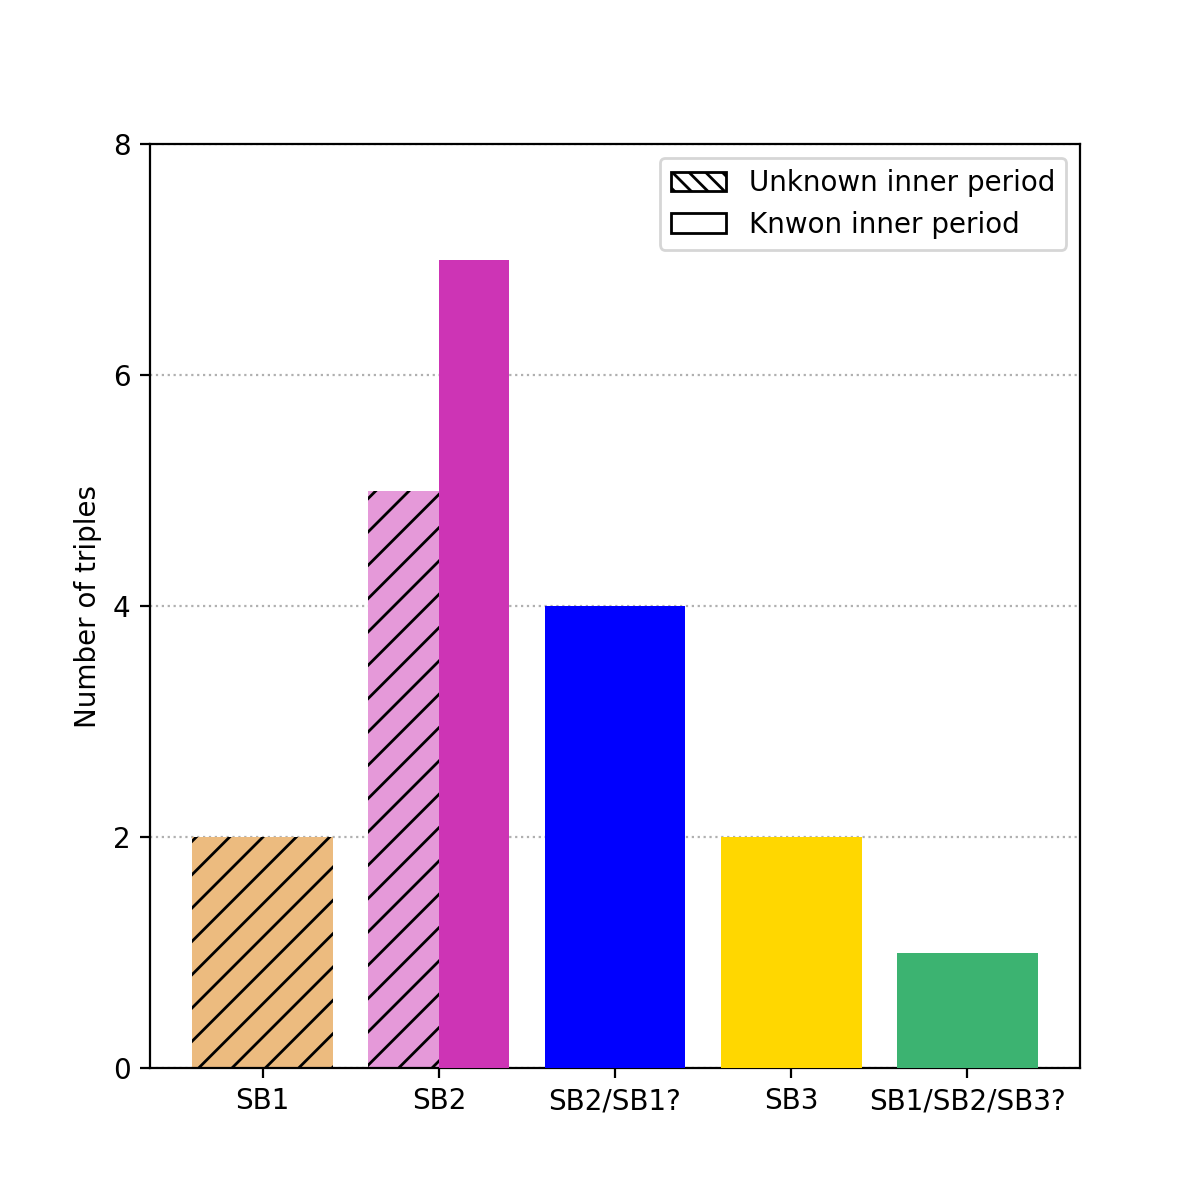

In [15]:
import matplotlib.patches as mpatches
import math

targets_Sb=number_sb2+number_c+number_sb1+number_sb2else+number_unknown+number_sb3
print(targets_Sb)
      
tot_targets=list(np.unique(triples_pionier['SB type']))
# print(np.where(triples_pionier['SB']=='SB'))

sb=['SB1','SB2','SB2/SB1?','SB3','SB1/SB2/SB3?']
unknwon_p=[len(sb1)-number_sb1,len(sb2)-number_sb2,len(sb2else)-number_sb2else,len(sb3)-number_sb3,len(unknown)-number_unknown]
known_p=[number_sb1,number_sb2,number_sb2else,number_sb3,number_unknown]
color=['#DA7800','#CD34B5','#0000FF','#FFD700','mediumseagreen']
color2=['#ECBB7F','#E599D9','#0000FF','#FFD700','#9DD8B7']
offset=[0,0.2,0,0,0]
width=[0.8,0.4,0.8,0.8,0.8]
alpha1=[0.5,1,1,1,0.5]

X_axis=np.arange(len(sb))

plt.figure(figsize=(6,6))

# offset=0.2

plt.bar(X_axis-offset,unknwon_p,width,label='Unknwon period',color=color2,alpha=1.,hatch='//',zorder=2)
plt.bar(X_axis+offset,known_p,width,label='Knwon period',color=color,zorder=3)

yint = range(0, math.ceil(10),2)

plt.yticks(yint)

plt.grid(axis='y',zorder=0,linestyle=':')
plt.legend()
plt.xticks(X_axis, sb)
plt.ylabel('Number of triples')
# plt.title('Triples with a detected PIONIER companion')

legend1=mpatches.Patch(facecolor='w',edgecolor='k',hatch=r'\\\\',label='Unknown inner period')
legend2=mpatches.Patch(facecolor='w',edgecolor='k',label='Knwon inner period')

plt.legend(handles = [legend1,legend2],loc='upper right')
plt.savefig(dir+'/paper/images/triples_sample.png',dpi=400)

plt.show()


In [45]:
#CORRELATION COEFFICIENTS
from scipy.stats import linregress

coeff_correl_sep_q=np.corrcoef(np.array(sep_pio),np.array(mass_ratio))
coeff_correl_mprim_q=np.corrcoef(np.array(mass_prim),np.array(mass_ratio))
coeff_correl_mabs=np.corrcoef(np.array(mabs_prim),np.array(mabs_comp))
coeff_correl_sep_mcomp=np.corrcoef(np.array(sep_pio),np.array(mass_comp))
coeff_correl_mprim_mcomp=np.corrcoef(np.array(mass_prim),np.array(mass_comp))


period_without_nan=[]
sep_in_without_nan=[]
sep_pio_without_nan=[]
mass_ratio_reduced=[]
mass_prim_reduced=[]
mass_comp_reduced=[]
a=0
for i in range (len(period_inner)):
    if np.isnan(period_inner[i]):
        continue
    else:
        period_without_nan.append(period_inner[i])
        sep_in_without_nan.append(sep_in[i])
        mass_ratio_reduced.append(mass_ratio[i])
        sep_pio_without_nan.append(sep_pio[i])
        mass_prim_reduced.append(mass_prim[i])
        mass_comp_reduced.append(mass_comp[i])

# print(len(sep_in_without_nan))
        
coeff_correl_pin_q=np.corrcoef(np.array(period_without_nan),np.array(mass_ratio_reduced))
coeff_correl_sep_pio_pin=np.corrcoef(np.array(period_without_nan),np.array(sep_pio_without_nan))
coeff_correl_sep_pio_in=np.corrcoef(np.array(sep_in_without_nan),np.array(sep_pio_without_nan))
coeff_correl_pin_mprim=np.corrcoef(np.array(mass_prim_reduced),np.array(period_without_nan))
coeff_correl_mout_pin=np.corrcoef(np.array(mass_comp_reduced),np.array(period_without_nan))

# print('AAAA',len(period_inner)-a)
# print(sep_in)
print(coeff_correl_mout_pin)

sep_ratio=np.array(sep_pio_without_nan)/np.array(sep_in_without_nan)
sep_ratio_2=np.array(sep_pio)/np.array(sep_in)
coeff_correl_qsep_q=np.corrcoef(np.array(sep_pio_without_nan),np.array(mass_ratio_reduced))
print(coeff_correl_qsep_q)

print("SEP PIO")
print(sep_pio_without_nan)
print("SEP INNER")
print(sep_in_without_nan)
print("SEP RATIO")
print(sep_ratio_2)

print(len(sep_ratio))
index_pio_in=np.where(sep_ratio_2<7.)
print(index_pio_in[0])
print(target_name[8])

print(coeff_correl_mprim_mcomp)
print(linregress(np.array(mass_prim),np.array(mass_comp)))

[[1.         0.18302697]
 [0.18302697 1.        ]]
[[1.        0.4627574]
 [0.4627574 1.       ]]
SEP PIO
[59.8, 105.6, 87.8, 3.3, 8.3, 28.1, 4.8, 27.4, 5.6, 154.4, 229.0, 85.2, 111.6, 140.7]
SEP INNER
[0.5249650456670718, 0.23049133391191434, 0.2798775358028977, 0.16099437389242693, 0.15387468691810727, 0.10287807385576526, 0.14222875346294436, 0.19464232074478924, 1.289302026875475, 0.33826313152573567, 0.5091700514167892, 0.13069676000828767, 1.0278213223894337, 0.07892429643094732]
SEP RATIO
[ 113.91234615  458.15171533  313.70863599   20.49761069   53.93999602
  273.13886183   33.74845018  140.77103014    4.34343535  456.44938987
           nan           nan  449.75151104           nan           nan
  651.89068187  108.57918353 1782.72099167           nan           nan
           nan]
14
[8]
CPD$-$47\degr2963
[[1.         0.73331245]
 [0.73331245 1.        ]]
LinregressResult(slope=0.5202676474199773, intercept=0.12148081470654404, rvalue=0.7333124479325864, pvalue=0.0001554346478

In [17]:
triples_pionier.keys()
error_dist=1e-3*np.array(error_distance)
dist=1e-3*np.array(distance)

print(distance)
error_sep_out=[]
for i in range (len(sep_pio)):
    error=sep_pio[i]*np.sqrt((error_dist[i]/dist[i])**2+(error_sep_pio[i]/sep_pio[i])**2)
    error_sep_out.append(error)
#     print(target_name[i])
#     print(error)
    
# FOR ALL SOURCES 
for i in range (0,len(triples_pionier['Target']),2):
    error_d=1e-3*(triples_pionier['err_distance (pc)'][i+1])
    d=1e-3*(triples_pionier['distance (pc)'][i+1])
    pio=triples_pionier['Sep (mas)'][i+1]
    pio_err=triples_pionier['err_sep (mas)'][i+1]
    pio_au=triples_pionier['Sep (au)'][i+1]
    err=pio_au*np.sqrt((error_d/d)**2+(pio_err/pio)**2)
    print(triples_pionier['Target'][i+1])
#     print(d,error_d,pio,pio_err,err)
    print(err)

print(4.8*np.sqrt((1.76/64.13)**2+(0.261/1099)**2))    
# print(error_sep_out)
# print(len(error_sep_out))

[2485.0, 3535.0, 3413.0, 862.0, 1194.0, 1045.0, 1099.0, 1610.0, 2109.0, 2528.0, 3029.0, 1701.0, 2192.0, 969.0, 1352.0, 1488.0, 1324.0, 1234.0, 1950.0, 2543.0, 2260.0]
HD93130
5.873320175521787
HD93206
1.2429030164654749
HD96670
3.2749133749390453
HD101190
12.440539718977549
HD135240
0.8815825377807409
HD150136
2.380269863119754
HD152233
1.4356498418966084
HD152246
0.8475632772009829
HD152623
11.918801299077582
HD158186
8.990011944480607
HD159176
1.1475316798563546
HD167971
0.6193943378805995
CPD$-$47\degr2963
0.29646958081198094
HD101131
29.320069786318975
HD101413
3.3295917803404733
HD101545A
1.1162878428923095
HD123590
0.8694817653794568
HD124314A
0.8832532012785613
HD148937
3.2381001243385827
HD150135
0.4369255692721653
HD151003
0.46925694715606975
HD152147
2.181932991199955
HD152234
1.4626312657598493
HD152247
0.35855571427542476
HD152314
4.278683772285437
HD152386
3.5183209206253423
HD152723
21.396344467171062
HD155806
6.1783772830175145
HD155889
23.018283183601593
HD156738
1.5036

In [18]:
def legend_without_duplicate_labels(ax,font=12,ncol=1):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),fontsize=font,ncol=ncol)


In [19]:
def stability_tokovinin(q,e):
    return 5**(2/3)/(1-e)**2*q**(1/3)

In [20]:
print(stability_tokovinin(0.6,0.5))

9.86484829732188


<IPython.core.display.Javascript object>


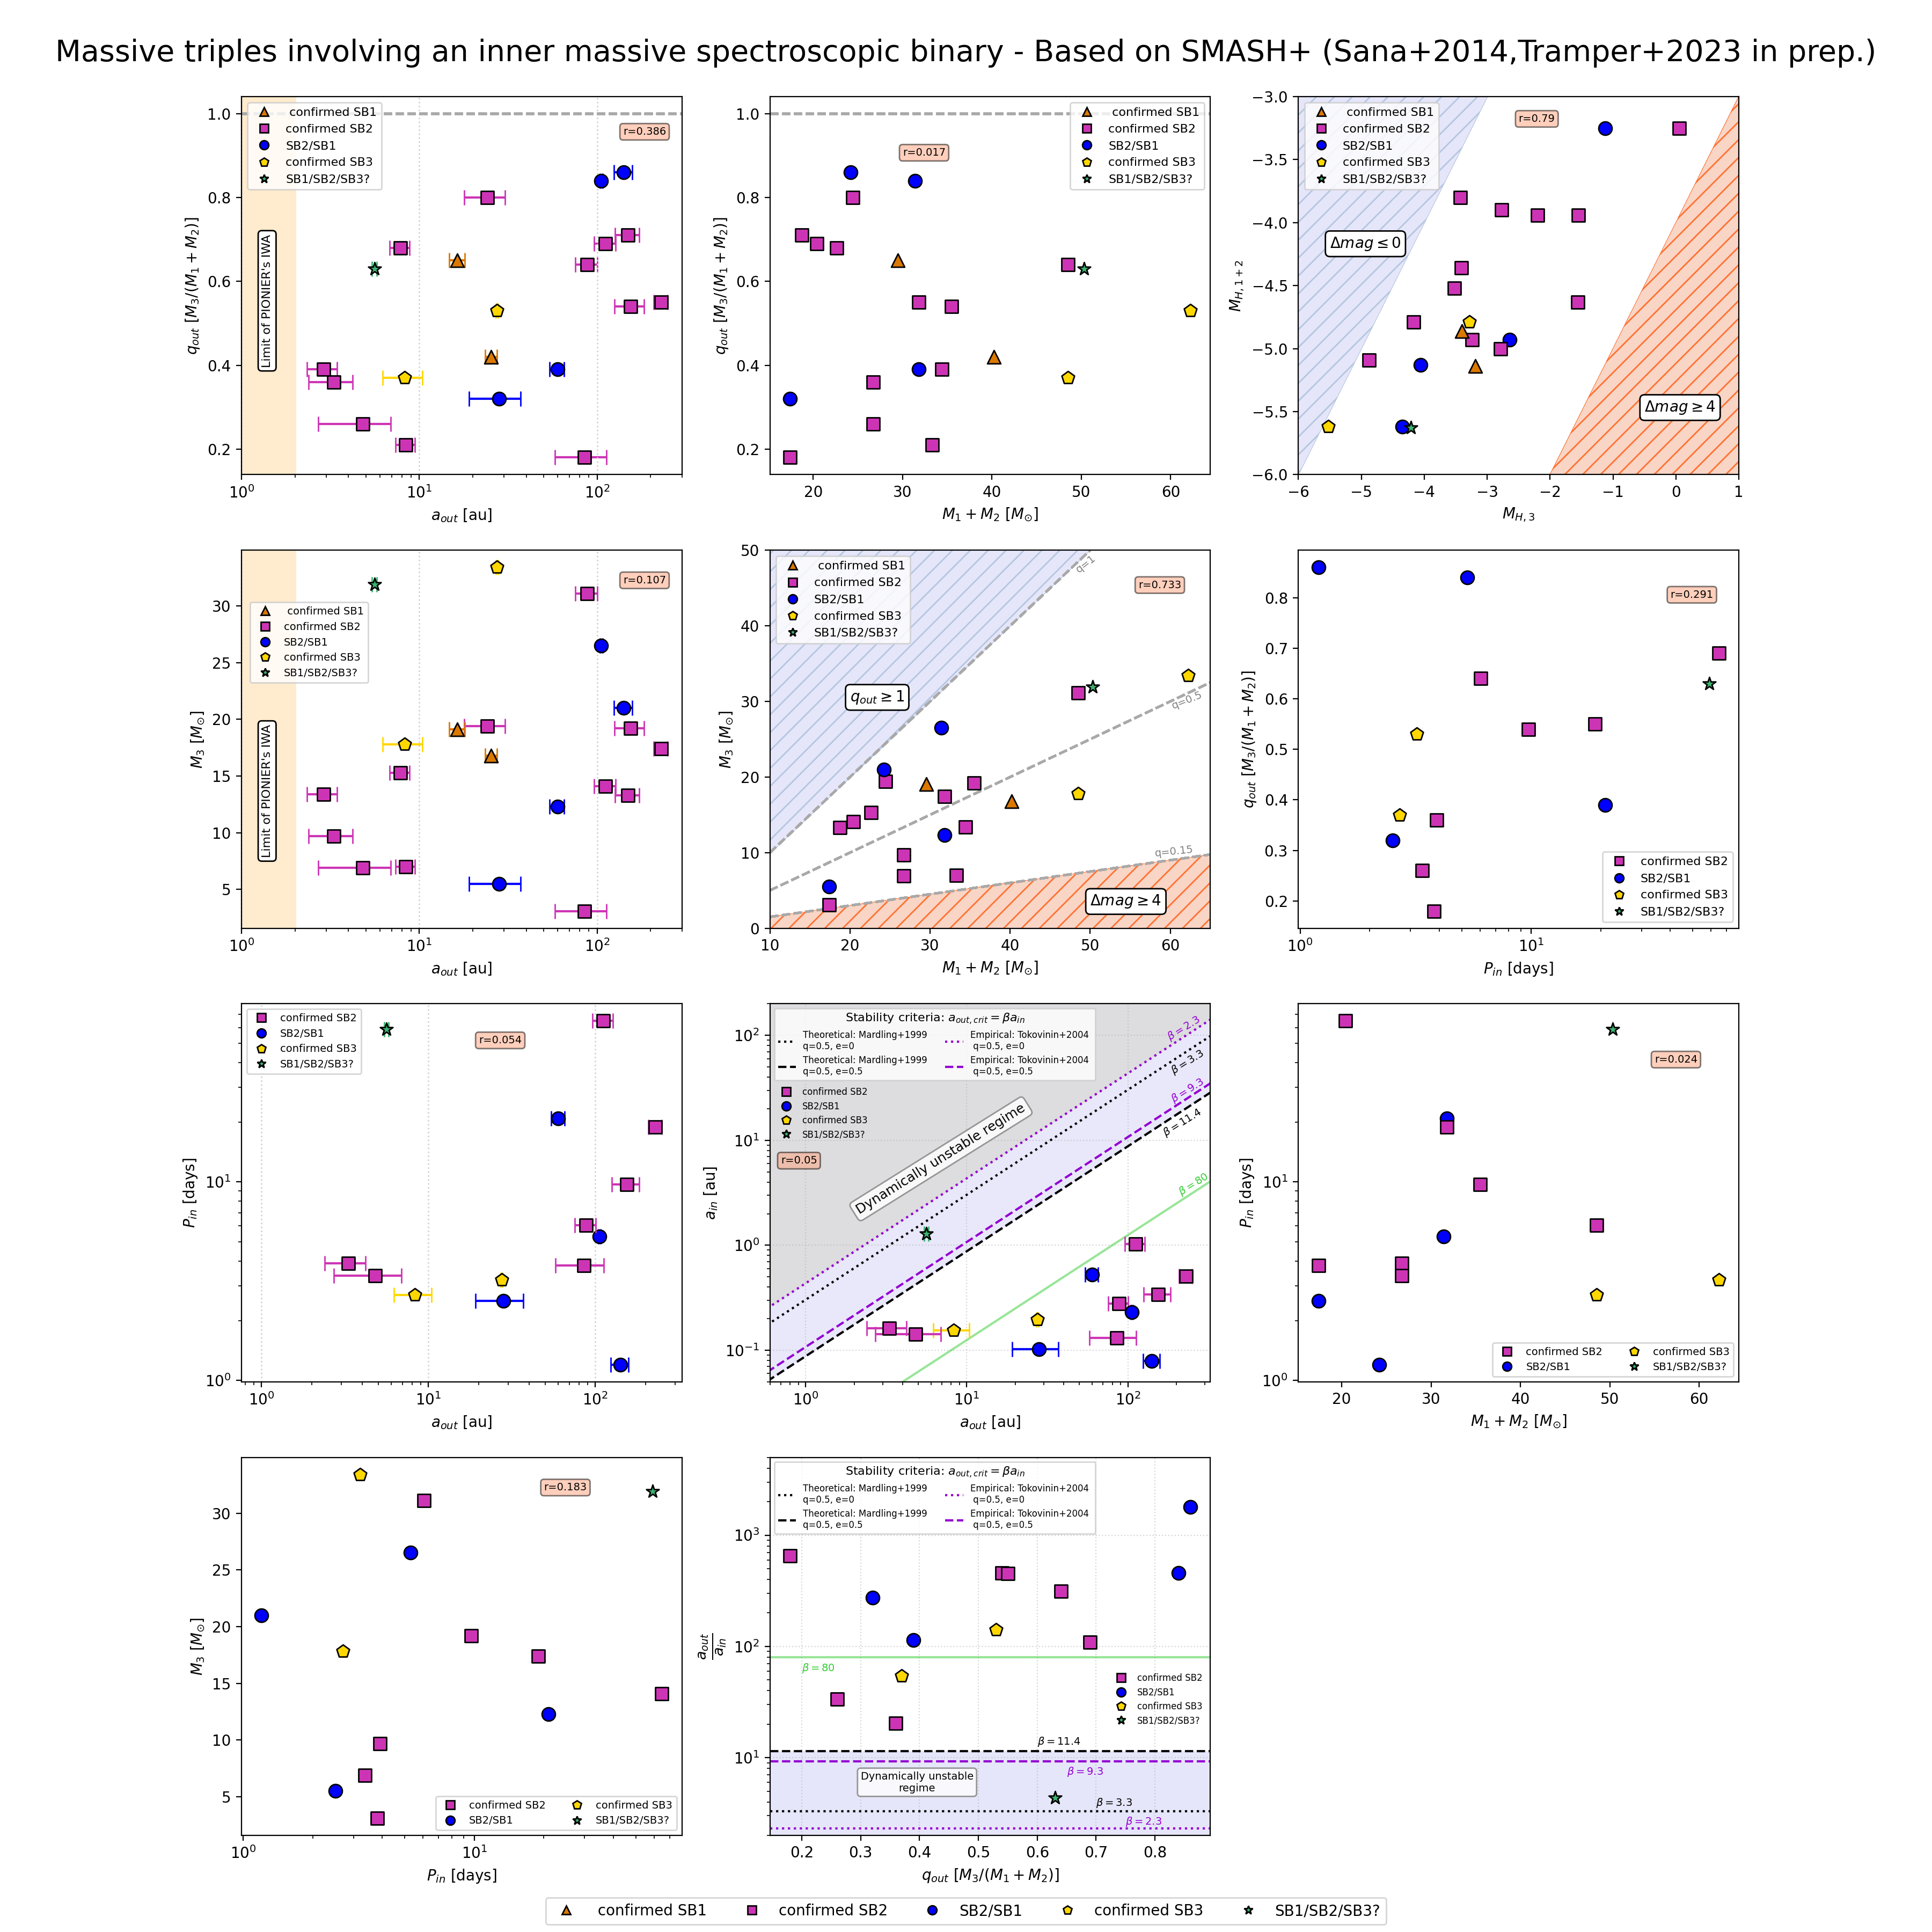

/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1105: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1106: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
<ipython-input-21-b3dad2757f2f>:252: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [21]:
from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
from adjustText import adjust_text
from matplotlib.legend import Legend


fig, ax=plt.subplots(4,3,figsize=(18,18),squeeze=True)

ax[0,0].axvline(x = 1, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[0,0].axvline(x = 10, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[0,0].axvline(x = 100, color = 'lightgrey',linewidth = 1,linestyle="dotted")

ax[2,0].axvline(x = 1, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[2,0].axvline(x = 10, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[2,0].axvline(x = 100, color = 'lightgrey',linewidth = 1,linestyle="dotted")

ax[1,0].axvline(x = 1, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[1,0].axvline(x = 10, color = 'lightgrey',linewidth = 1,linestyle="dotted")
ax[1,0].axvline(x = 100, color = 'lightgrey',linewidth = 1,linestyle="dotted")

legend_elements = [Line2D([0], [0], marker='^',color='#DA7800',markeredgecolor='k', label=' confirmed SB1',linestyle='None'),
           Line2D([0], [0], marker='s',color='#CD34B5',markeredgecolor='k', label='confirmed SB2',linestyle='None'),
                  Line2D([0], [0], marker='o',color='#0000FF',markeredgecolor='k', label='SB2/SB1',linestyle='None'),
                  Line2D([0], [0], marker='p',color='#FFD700',markeredgecolor='k', label='confirmed SB3',linestyle='None'),
                   Line2D([0], [0], marker='*',color='mediumseagreen',markeredgecolor='k', label='SB1/SB2/SB3?',linestyle='None')]
legend_elements2=legend_elements[1:]

for i in range (len(sep_pio)):
    ax[0,0].scatter(sep_pio[i],mass_ratio[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=5)
    ax[0,0].errorbar(sep_pio[i],mass_ratio[i],xerr=error_sep_out[i],color=color_plot[i],capsize=5,zorder=0)
    ax[0,0].axhline(y = 1., color = 'darkgrey', linestyle = '--')
    ax[0,0].axvspan(1, 2, alpha=0.1, color='blanchedalmond',label='Drop in PIONIER\'s sensitivity')
#     ax[0,0].plot([0.2,1,10,100],[0.2**(-1/3),1**(-1/3),np.sqrt(10),np.sqrt(100)], color='k',linestyle='--',label='Test')
    
    ax[0,1].scatter(mass_prim[i],mass_ratio[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80)
    ax[0,1].axhline(y = 1., color = 'darkgrey', linestyle = '--',zorder=0)
    ax[0,2].scatter(mabs_comp[i],mabs_prim[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80, zorder=4)
#     ax[0,2].plot([-2,1], [-6,-3], color='darkgrey',linestyle='--')
    ax[0,2].fill([-2,1,1,-2],[-6,-3,-6,-6], color="#F9D5C5", hatch="//", edgecolor="#FF6925", linewidth=0.2,alpha=0.9)
    ax[0,2].fill([-6,-6,-3,-6],[-6,-3,-3,-6], color="lavender", hatch="//", edgecolor="lightsteelblue", linewidth=0.2,alpha=0.9)
#     ax[0,2].fill_between([1,-6],[-2,-6],color="#361AE5", hatch="//", edgecolor="#9D02D7", linewidth=0.2,alpha=0.9)
    
    ax[1,0].errorbar(sep_pio[i],mass_comp[i],xerr=error_sep_out[i],color=color_plot[i],capsize=5,zorder=4)
    ax[1,0].scatter(sep_pio[i],mass_comp[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80, zorder=4)
    ax[1,0].axvspan(1, 2, alpha=0.1, color='blanchedalmond',label='Drop in PIONIER\'s sensitivity')
    
    ax[1,1].scatter(mass_prim[i],mass_comp[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=5)
    ax[1,1].plot([10,20,50], [10,20,50], color='darkgrey',linestyle='--')
    ax[1,1].plot([10,20,70],[5,10,35], color='darkgrey',linestyle='--')
#     ax[1,1].plot([10,20,70],[1,2,7],color='darkgrey',linestyle='--')
    ax[1,1].plot([10,30,65],[1.5,4.5,9.75],color='darkgrey',linestyle='--')
    ax[1,1].fill([10,10,65,65,10],[0,1.5,9.75,0,0], color="#F9D5C5", hatch="//", edgecolor="#FF6925", linewidth=0.2,alpha=0.9)
    ax[1,1].fill([10,10,50,50,10],[10,50,50,50,10], color="lavender", hatch="//", edgecolor="lightsteelblue", linewidth=0.2,alpha=0.9)
    
    ax[1,2].scatter(period_inner[i],mass_ratio[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=4)
    
    ax[2,0].errorbar(sep_pio[i],period_inner[i],xerr=error_sep_out[i],color=color_plot[i],capsize=5,zorder=4)
    ax[2,0].scatter(sep_pio[i],period_inner[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=4)
    
    ax[2,2].scatter(mass_prim[i],period_inner[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=4)
    
    ax[3,0].scatter(period_inner[i],mass_comp[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=4)
#     ax[3,1].scatter(mass_ratio[i],sep_ratio_2[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=60, zorder=4)
# #     ax[3,1].axhline(y = 5., color = 'darkgrey', linestyle = '--') 

    

#     for i in range(len(sep_ratio_2)):
#         if i in index_pio_in[0]:
#             ax[2,1].scatter(sep_pio[i],sep_in[i],color=color_plot[i],edgecolor='dodgerblue',marker=marker[i],linewidth=1.5,s=80,zorder=4)#,label='SBs detected by PIONIER')
#             ax[3,1].scatter(mass_ratio[i],sep_ratio_2[i],color=color_plot[i],edgecolor='dodgerblue',marker=marker[i],linewidth=1.5, s=60, zorder=4,label='SBs detected by PIONIER')

#         else:
    ax[2,1].errorbar(sep_pio[i],sep_in[i],xerr=error_sep_out[i],color=color_plot[i],capsize=5,zorder=4)
    ax[2,1].scatter(sep_pio[i],sep_in[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80,zorder=5)
    
    
    ax[3,1].scatter(mass_ratio[i],sep_ratio_2[i],color=color_plot[i],edgecolor='k',marker=marker[i], s=80, zorder=4)
    
#     ax[2,1].plot([0.5,2.5,100,325],[0.16,0.83,6.6,21.6], color='black',linestyle='--',label=r'$a')
ax[2,1].plot([0.5,2.5,100,325],[0.5/3.3,2.5/3.3,100/3.3,325/3.3], color='k',linestyle=':',label='Theoretical: Mardling+1999'+'\n'+'q=0.5, e=0')
ax[2,1].plot([0.5,2.5,100,325],[0.5/11.4,2.5/11.4,100/11.4,325/11.4], color='k',linestyle='--',label='Theoretical: Mardling+1999'+'\n'+'q=0.5, e=0.5')
ax[2,1].plot([0.5,2.5,100,325],[0.5/2.3,2.5/2.3,100/2.3,325/2.3], color='darkviolet',linestyle=':',label='Empirical: Tokovinin+2004 '+'\n'+' q=0.5, e=0')
ax[2,1].plot([0.5,2.5,100,325],[0.5/9.3,2.5/9.3,100/9.3,325/9.3], color='darkviolet',linestyle='--',label='Empirical: Tokovinin+2004 '+'\n'+' q=0.5, e=0.5')
ax[2,1].plot([0.5,2.5,100,325],[0.5/80,2.5/80,100/80,325/80], color='limegreen',linestyle='-',alpha=0.5)#,label=r'$\beta=50$')

ax[2,1].fill([0.5,0.5,325,325,0.5],[0.5/11.4,200,200,325/11.4,0.5/11.4], color="lavender", linewidth=0.2,alpha=0.9)
ax[2,1].fill([0.5,0.5,325,325,0.5],[0.5/2.3,200,200,325/2.3,0.5/2.3], color="gainsboro", linewidth=0.2,alpha=0.9)
    
    
ax[3,1].axhline(y = 3.3, color='k',linestyle=':',label='Theoretical: Mardling+1999'+'\n'+'q=0.5, e=0')
ax[3,1].axhline(y = 11.4, color='k',linestyle='--',label='Theoretical: Mardling+1999'+'\n'+'q=0.5, e=0.5')
ax[3,1].axhline(y = 2.3, color='darkviolet',linestyle=':',label='Empirical: Tokovinin+2004 '+'\n'+' q=0.5, e=0')
ax[3,1].axhline(y = 9.3, color='darkviolet',linestyle='--',label='Empirical: Tokovinin+2004 '+'\n'+' q=0.5, e=0.5')
ax[3,1].axhline(y = 80, color='limegreen',linestyle='-',alpha=0.5)#,label='Empirical: Tokovinin+2004 '+'\n'+' q=0.5, e=0.5')

# legend_without_duplicate_labels(ax[2,1],font=6,ncol=2)
# legend_without_duplicate_labels(ax[3,1],font=6,ncol=2)
ax[2,1].legend(handles=legend_elements2,loc='upper right',bbox_to_anchor=(0.24,0.80), fontsize=6,ncol=1,frameon=False)
handles, labels = ax[2,1].get_legend_handles_labels()
leg=Legend(ax[2,1],handles=handles,labels=labels,loc='upper left',title=r"Stability criteria: $a_{out,crit}=\beta a_{in}$",title_fontsize=8,fontsize=6,ncol=2)
ax[2,1].add_artist(leg)
# ax[2,1].get_legend().set_title(r"Stability criteria: $a_{out,crit}=\beta a_{in}$",prop={'size':8})
# ax[3,1].get_legend().set_title(r"Stability criteria: $a_{out,crit}=\beta a_{in}$",prop={'size':8})

ax[3,1].legend(handles=legend_elements2,loc='upper right',bbox_to_anchor=(1.0,0.45), fontsize=6,ncol=1,frameon=False)
handles, labels = ax[3,1].get_legend_handles_labels()
leg=Legend(ax[3,1],handles=handles,labels=labels,loc='upper left',title=r"Stability criteria: $a_{out,crit}=\beta a_{in}$",title_fontsize=8,fontsize=6,ncol=2)
ax[3,1].add_artist(leg)

#     legend_without_duplicate_labels(ax[3,1])

texts=[]
xytext=[(6.489,10.5),(3.72,10.2),(0.82,10.5),(3.39,-3),(3.05,8.4),(1.6,8.),(4.411,10.),(14.5,2),(17.76,0),(6.019,-2.5),(11.93,6.5),(0.415,4),(2.12,12)]
a=0
for i in index_pio_in[0]:
    ax[3,2].errorbar(sep_in[i],sep_pio[i],error_sep_out[i],color=color_plot[i],zorder=4)
    ax[3,2].scatter(sep_in[i],sep_pio[i],color=color_plot[i],marker=marker[i],edgecolor='dodgerblue',s=80,linewidth=1.5,zorder=5)
#     texts.append(ax[3,2].text(sep_in[i]-1,sep_pio[i]+2,target_name[i],size=8,rotation=90))
    ax[3,2].annotate(target_name[i], (sep_in[i], sep_pio[i]), xytext=xytext[a], rotation=90, size=8, arrowprops = dict(arrowstyle="-", alpha=0.3)) #wedge,tail_width=0.5
#     ax[3,2].text(xytext[a][0],xytext[a][1],target_name[i],rotation=90)
    a+=1
ax[3,2].axline((0,0),(15,15), color = '#0000FF',linewidth = 1.5,linestyle='--')

props = dict(boxstyle='round', facecolor='lightsalmon', alpha=0.5)
    
ax[0,0].text(140, 0.95, 'r='+str(abs(round(coeff_correl_sep_q[0,1],3))), size=7, rotation=0,bbox=props)
ax[0,0].text(1.3,0.4,r"Limit of PIONIER's IWA",size=8, rotation=90,bbox=dict(boxstyle='round', facecolor='white'))

ax[0,1].text(30, 0.9, 'r='+str(abs(round(coeff_correl_mprim_q[0,1],3))), size=7, rotation=0,bbox=props)
ax[0,2].text(-2.5, -3.2, 'r='+str(abs(round(coeff_correl_mabs[0,1],3))), size=7, rotation=0,bbox=props)
ax[0,2].text(-0.5,-5.5,r'$\Delta mag\geq4$',size=10, rotation=0,bbox=dict(boxstyle='round', facecolor='white'))
ax[0,2].text(-5.5,-4.20,r'$\Delta mag\leq0$',size=10, rotation=0,bbox=dict(boxstyle='round', facecolor='white'))

ax[1,0].text(140, 32, 'r='+str(abs(round(coeff_correl_sep_mcomp[0,1],3))), size=7, rotation=0,bbox=props)
ax[1,0].text(1.3,8,r"Limit of PIONIER's IWA",size=8, rotation=90,bbox=dict(boxstyle='round', facecolor='white'))
ax[1,1].text(56, 45, 'r='+str(abs(round(coeff_correl_mprim_mcomp[0,1],3))), size=7, rotation=0,bbox=props)
ax[1,1].text(50,3,r'$\Delta mag\geq4$',size=10, rotation=0,bbox=dict(boxstyle='round', facecolor='white'))
ax[1,1].text(20,30,r'$q_{out}\geq1$',size=10, rotation=0,bbox=dict(boxstyle='round', facecolor='white'))
ax[1,2].text(40, 0.8, 'r='+str(abs(round(coeff_correl_pin_q[0,1],3))), size=7, rotation=0,bbox=props)

ax[2,0].text(20, 50, 'r='+str(abs(round(coeff_correl_sep_pio_pin[0,1],3))), size=7, rotation=0,bbox=props)
ax[2,1].text(0.7, 6, 'r='+str(abs(round(coeff_correl_sep_pio_in[0,1],3))), size=7, rotation=0,bbox=props)
ax[2,1].text(2,2,r'Dynamically unstable regime',size=9, rotation=32,ma='center',bbox=dict(boxstyle='round', facecolor='white', ec="0.5",alpha=0.8))
ax[2,2].text(55, 40, 'r='+str(abs(round(coeff_correl_pin_mprim[0,1],3))), size=7, rotation=0,bbox=props)

ax[3,0].text(20, 32, 'r='+str(abs(round(coeff_correl_mout_pin[0,1],3))), size=7, rotation=0,bbox=props)
ax[3,1].text(40, 100, 'r='+str(abs(round(coeff_correl_qsep_q[0,1],3))), size=7, rotation=0,bbox=props)
ax[3,1].text(0.3,5,r'Dynamically unstable'+'\n'+'regime',size=7, rotation=0,ma='center',bbox=dict(boxstyle='round', facecolor='white', ec="0.5",alpha=0.8))
# ax[3,2].text(7.5, 18, 'r='+str(abs(round(coeff_correl_sepinout[0,1],3))), size=10, rotation=0,bbox=props)

ax[0,0].set_xlabel('$a_{out}$ [au]')
ax[0,0].set_ylabel(r'$q_{out}$ [$M_{3}/(M_{1}+M_{2})$]')
ax[0,0].set_xscale('log')
ax[0,0].set_xlim(1,300)
# ax[0,0].set_title('Mass ratios')
ax[0,0].legend(handles=legend_elements,loc='upper left', fontsize=8,ncol=1)

ax[0,1].set_xlabel(r'$M_{1}+M_{2} \,\, [M_{\odot}$]')
ax[0,1].set_ylabel(r'$q_{out}$ [$M_{3}/(M_{1}+M_{2})$]')
# ax[0,1].set_title('Mass ratios')
ax[0,1].legend(handles=legend_elements,loc='upper right', fontsize=8,ncol=1)

ax[0,2].set_xlabel(r'$M_{H,3}$')
ax[0,2].set_ylabel(r'$M_{H,1+2}$')
# ax[0,2].set_title('Absolute magnitudes H-band')
ax[0,2].set_ylim(-6,-3)
ax[0,2].set_xlim(-6,1)
ax[0,2].legend(handles=legend_elements,loc='upper left', fontsize=8,ncol=1)

ax[1,0].set_xlabel('$a_{out}$ [au]')
ax[1,0].set_ylabel(r'$M_{3} \,\, [M_{\odot}$]')
ax[1,0].set_xscale('log')
ax[1,0].set_xlim(1,300)
# ax[1,0].set_title(r'$M_{out} \,\,  vs \,\, Separation$')
ax[1,0].legend(handles=legend_elements,loc=(0.02,0.65), facecolor='white', fontsize=7,ncol=1)

ax[1,1].set_xlabel(r'$M_{1}+M_{2} \,\, [M_{\odot}$]')
ax[1,1].set_ylabel(r'$M_{3} \,\, [M_{\odot}$]')
# ax[1,1].set_title(r'$M_{out} \,\,  vs \,\, M_{in}$')
ax[1,1].text(48, 47, "q=1", color='grey',size=7, rotation=38)
ax[1,1].text(60, 29, "q=0.5", color='grey',size=7, rotation=22)
ax[1,1].text(58, 9.5, "q=0.15", color='grey',size=7, rotation=6)
ax[1,1].set_ylim(0,50)
ax[1,1].set_xlim(10,65)
ax[1,1].legend(handles=legend_elements,loc='upper left', fontsize=8,ncol=1)

ax[1,2].set_xlabel(r'$P_{in}$ [days]')
ax[1,2].set_ylabel(r'$q_{out}$ [$M_{3}/(M_{1}+M_{2})$]')
ax[1,2].set_xscale('log')
# ax[1,2].set_title(r'$q \,\,  vs \,\, P_{in}$')
ax[1,2].legend(handles=legend_elements2,loc='lower right', fontsize=8,ncol=1)

ax[2,0].set_xlabel(r'$a_{out}$ [au]')
ax[2,0].set_ylabel(r'$P_{in}$ [days]')
ax[2,0].set_yscale('log')
ax[2,0].set_xscale('log')
# ax[2,0].set_title(r'$P_{in} \,\,  vs \,\, a_{out}$')
ax[2,0].legend(handles=legend_elements2,loc='upper left', fontsize=7,ncol=1)

ax[2,1].set_xlabel(r'$a_{out}$ [au]')
ax[2,1].set_ylabel(r'$a_{in}$ [au]')
ax[2,1].set_yscale('log')
ax[2,1].set_xscale('log')
# ax[2,1].set_title(r'$a_{in} \,\,  vs \,\, a_{out}$')
ax[2,1].text(170, 90, r'$\beta=2.3$', color='darkviolet',size=7, rotation=32)
ax[2,1].text(180, 43, r'$\beta=3.3$', color='k',size=7, rotation=32)
ax[2,1].text(180, 23, r'$\beta=9.3$', color='darkviolet',size=7, rotation=32)
ax[2,1].text(160, 11, r'$\beta=11.4$', color='k',size=7, rotation=32)
ax[2,1].text(200, 3, r'$\beta=80$', color='limegreen',size=7, rotation=32)
ax[2,1].set_xlim(0.6,325)
ax[2,1].set_ylim(0.05,200)
ax[2,1].grid(alpha=0.5,linestyle=':')

ax[2,2].set_xlabel('$M_{1}+M_{2} \,\, [M_{\odot}$]')
ax[2,2].set_ylabel(r'$P_{in}$ [days]')
ax[2,2].set_yscale('log')
# ax[2,2].set_title(r'$P_{in} \,\,  vs \,\, M_{in}$')
ax[2,2].legend(handles=legend_elements2,loc='lower right', fontsize=7,ncol=2)

ax[3,0].set_xlabel(r'$P_{in}$ [days]')
ax[3,0].set_ylabel(r'$M_{3} \,\, [M_{\odot}$]')
ax[3,0].set_xscale('log')
# ax[3,0].set_title(r'$M_{out} \,\, vs \,\, P_{in} $')
ax[3,0].legend(handles=legend_elements2,loc='lower right', fontsize=7,ncol=2)


ax[3,1].set_xlabel(r'$q_{out}$ [$M_{3}/(M_{1}+M_{2})$]')
ax[3,1].set_ylabel(r'$\frac{a_{out}}{a_{in}}$',fontsize=14)
ax[3,1].set_yscale('log')
# ax[3,1].set_title(r'$a_{out}/a_{in} \,\,  vs \,\, q$')
ax[3,1].text(0.6, 13, r'$\beta=11.4$', color='k',size=7, rotation=0)
ax[3,1].text(0.65, 7, r'$\beta=9.3$', color='darkviolet',size=7, rotation=0)
ax[3,1].text(0.70, 3.7, r'$\beta=3.3$', color='k',size=7, rotation=0)
ax[3,1].text(0.75, 2.5, r'$\beta=2.3$', color='darkviolet',size=7, rotation=0)
ax[3,1].text(0.2, 60, r'$\beta=80$', color='limegreen',size=7, rotation=0)

ax[3,1].axhspan(0.1, 11.4, facecolor='lavender')#, alpha=0.5)
ax[3,1].set_ylim(2,5000)
ax[3,1].grid(alpha=0.5,linestyle=':')

# ax[3,2].set_xlabel(r'Separation inner binary [au]')
# ax[3,2].set_ylabel('Separation outer binary [au]')
# ax[3,2].set_title('Separation detected by Pionier against'+ '\n' +'separation reported by spectroscopy')
# ax[3,2].text(15.5,14.5,r'$Sep_{out}=Sep_{in}$',color='#0000FF',size=8, rotation=31)

ax[3,2].remove()

 
fig.legend(handles=legend_elements,loc='lower center', ncol=5)
fig.suptitle('Massive triples involving an inner massive spectroscopic binary - Based on SMASH+ (Sana+2014,Tramper+2023 in prep.)',size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95,bottom=0.05)

# adjust_text(texts)

plt.savefig(dir+'paper/images/Triples_newplots3_without_titles_version3.png',dpi=400)

plt.show()

In [22]:
np.sort(mass_ratio)

array([0.18, 0.21, 0.26, 0.32, 0.36, 0.37, 0.39, 0.39, 0.42, 0.53, 0.54,
       0.55, 0.63, 0.64, 0.65, 0.68, 0.69, 0.71, 0.8 , 0.84, 0.86])

In [23]:
mass_ratio=np.array(mass_ratio)
print(np.where(mass_ratio==np.max(mass_ratio)))
mass_r=np.delete(mass_ratio,np.where(mass_ratio==np.max(mass_ratio)))
# list.remove(1.86)
print(mass_r)
mass_comp2=np.delete(mass_comp,np.where(mass_comp==np.max(mass_comp)))
print(np.max(mass_comp2))

(array([17]),)
[0.39 0.84 0.64 0.36 0.37 0.32 0.26 0.53 0.63 0.54 0.68 0.39 0.55 0.8
 0.71 0.18 0.69 0.21 0.65 0.42]
31.9


In [28]:
print(mass_comp2)
print(np.sort(mass_ratio))

[12.3 26.5 31.1  9.7 17.8  5.5  6.9 31.9 19.2 15.3 13.4 17.4 19.4 13.3
  3.1 14.1 21.   7.  19.1 16.8]
[0.18 0.21 0.26 0.32 0.36 0.37 0.39 0.39 0.42 0.53 0.54 0.55 0.63 0.64
 0.65 0.68 0.69 0.71 0.8  0.84 0.86]


20


<IPython.core.display.Javascript object>


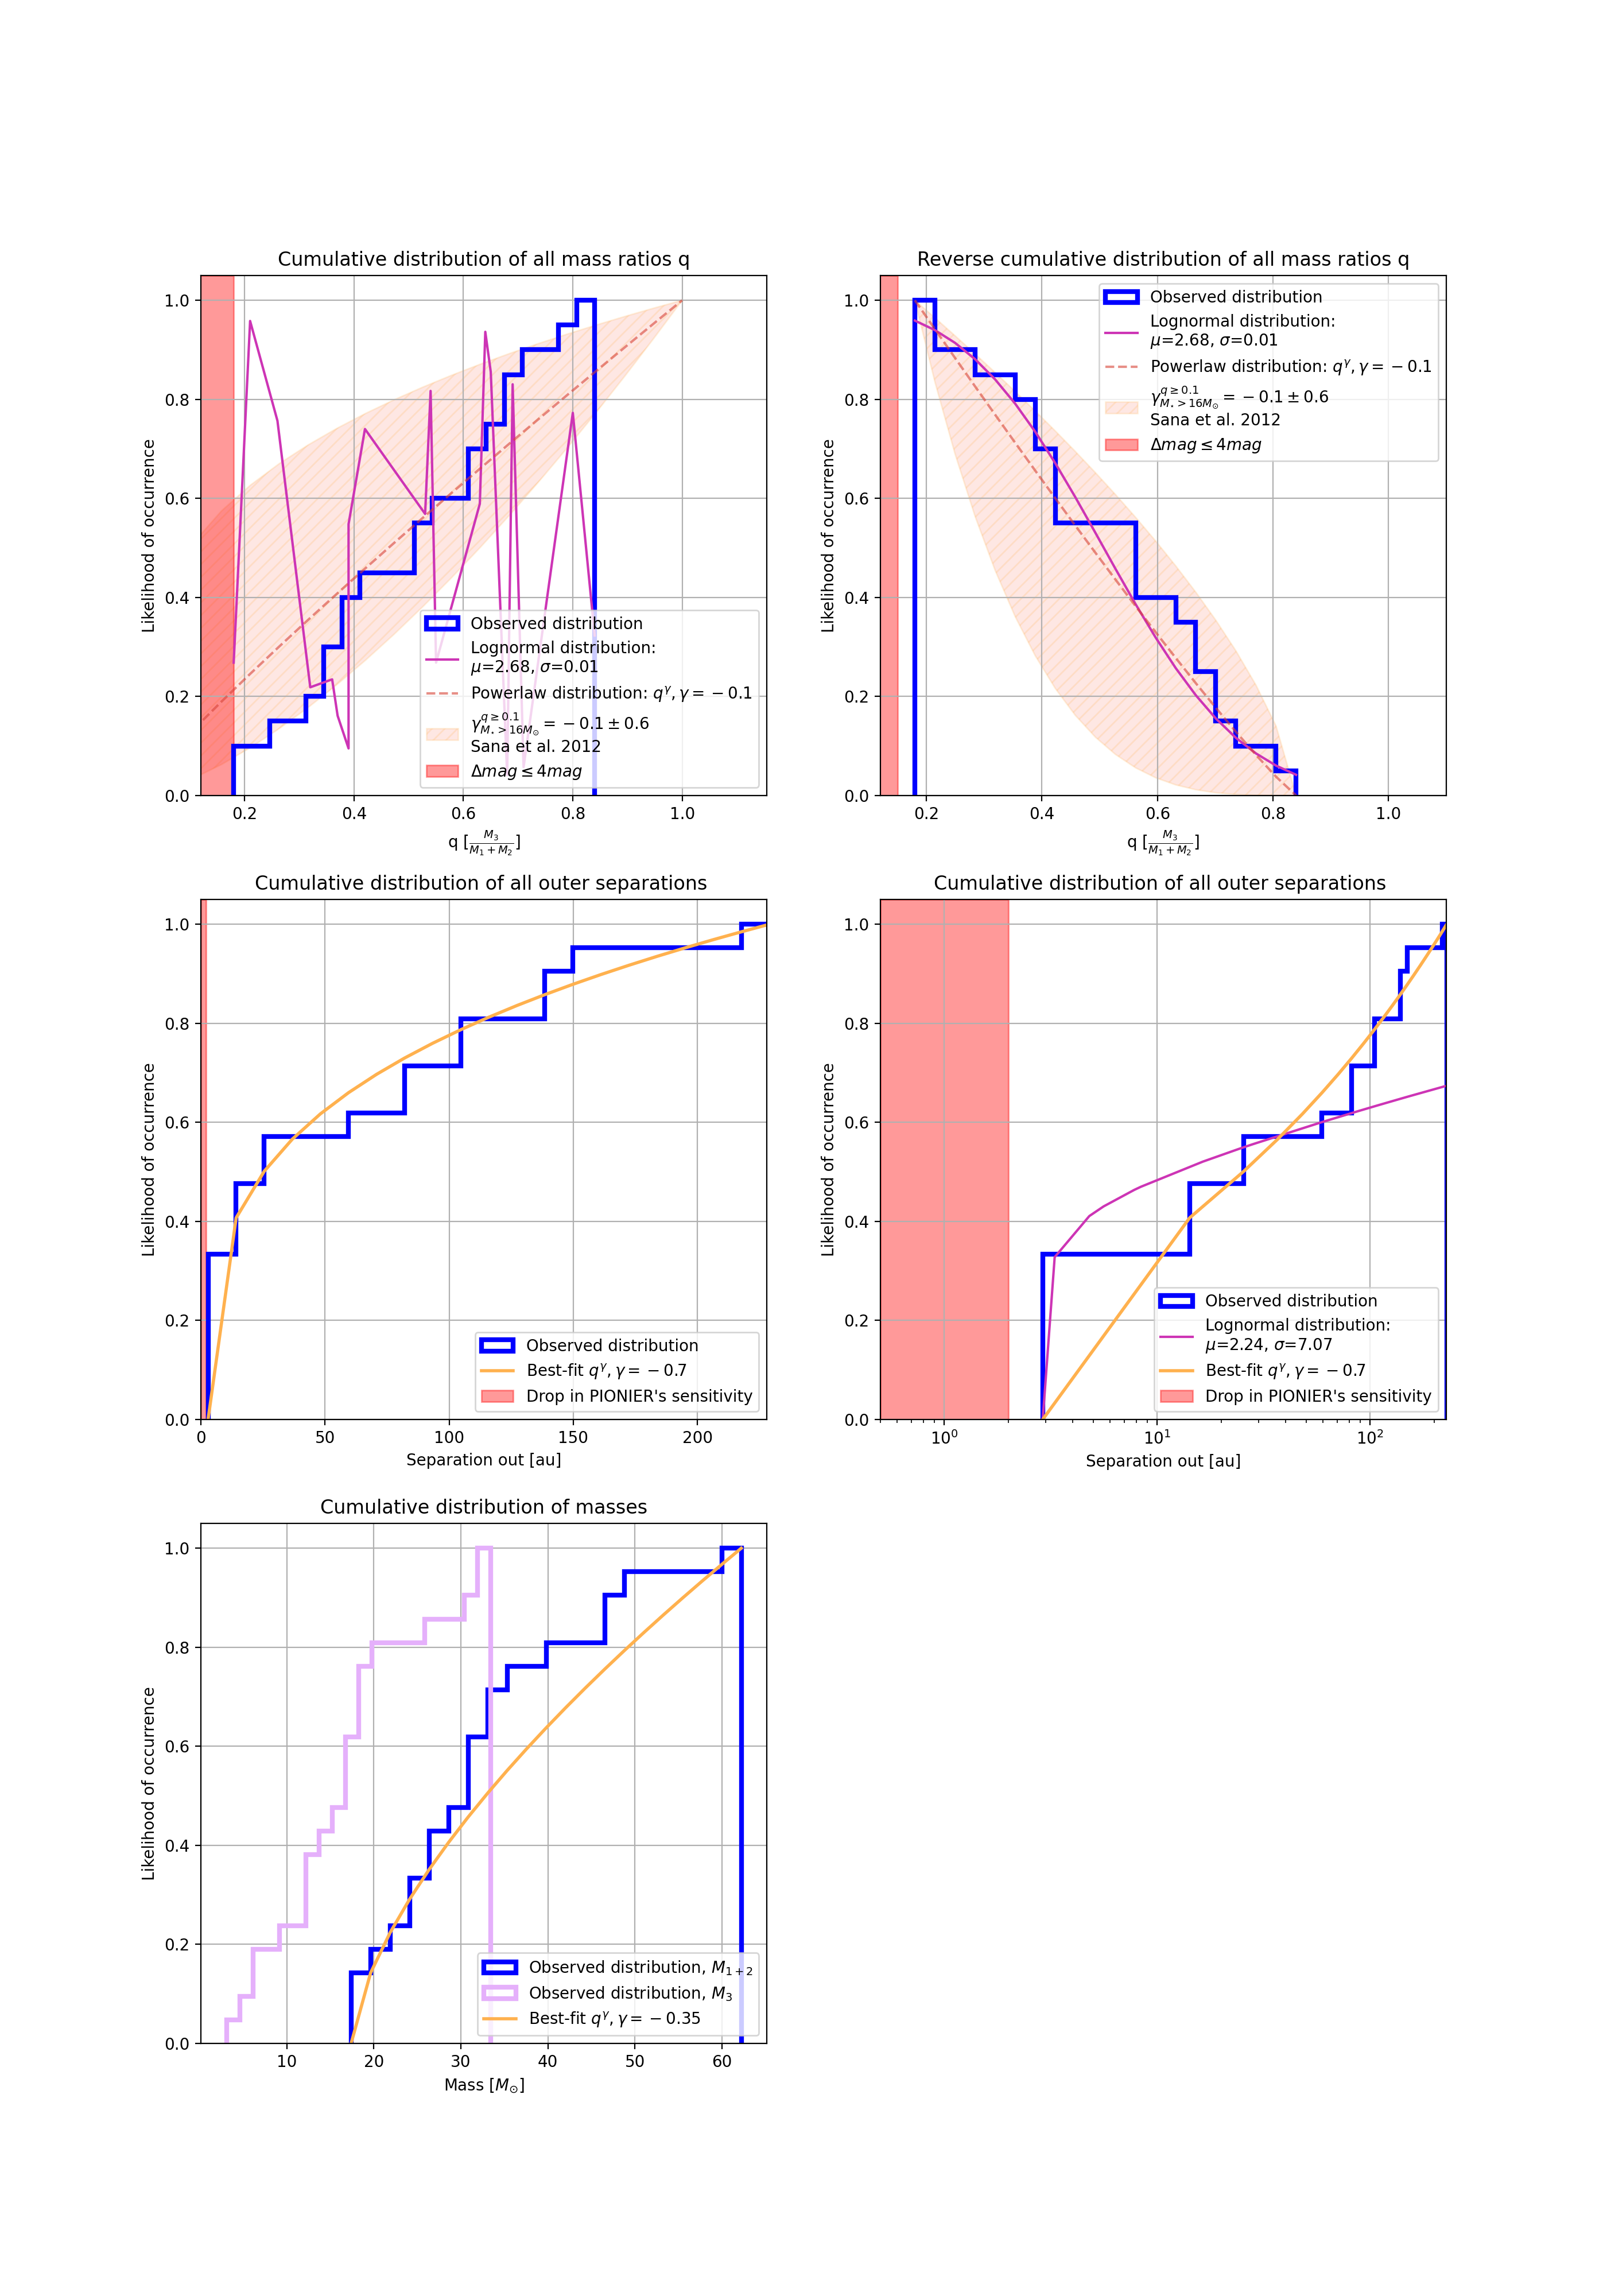

(0.013042288151987859, -14.07771736241967, 14.584794531740378)
[0.84  0.807 0.774 0.741 0.708 0.675 0.642 0.609 0.576 0.543 0.51  0.477
 0.444 0.411 0.378 0.345 0.312 0.279 0.246 0.213 0.18 ]
Mu= 2.6799795155783808
Sigma= (0.013042288151987859,)
(7.0656409543330065, 2.8999999999999995, 9.353955286280812)
(7.0656409543330065, 2.8999999999999995, 9.353955286280812)
BIINS2 [ 3.1    4.615  6.13   7.645  9.16  10.675 12.19  13.705 15.22  16.735
 18.25  19.765 21.28  22.795 24.31  25.825 27.34  28.855 30.37  31.885
 33.4  ]


<IPython.core.display.Javascript object>


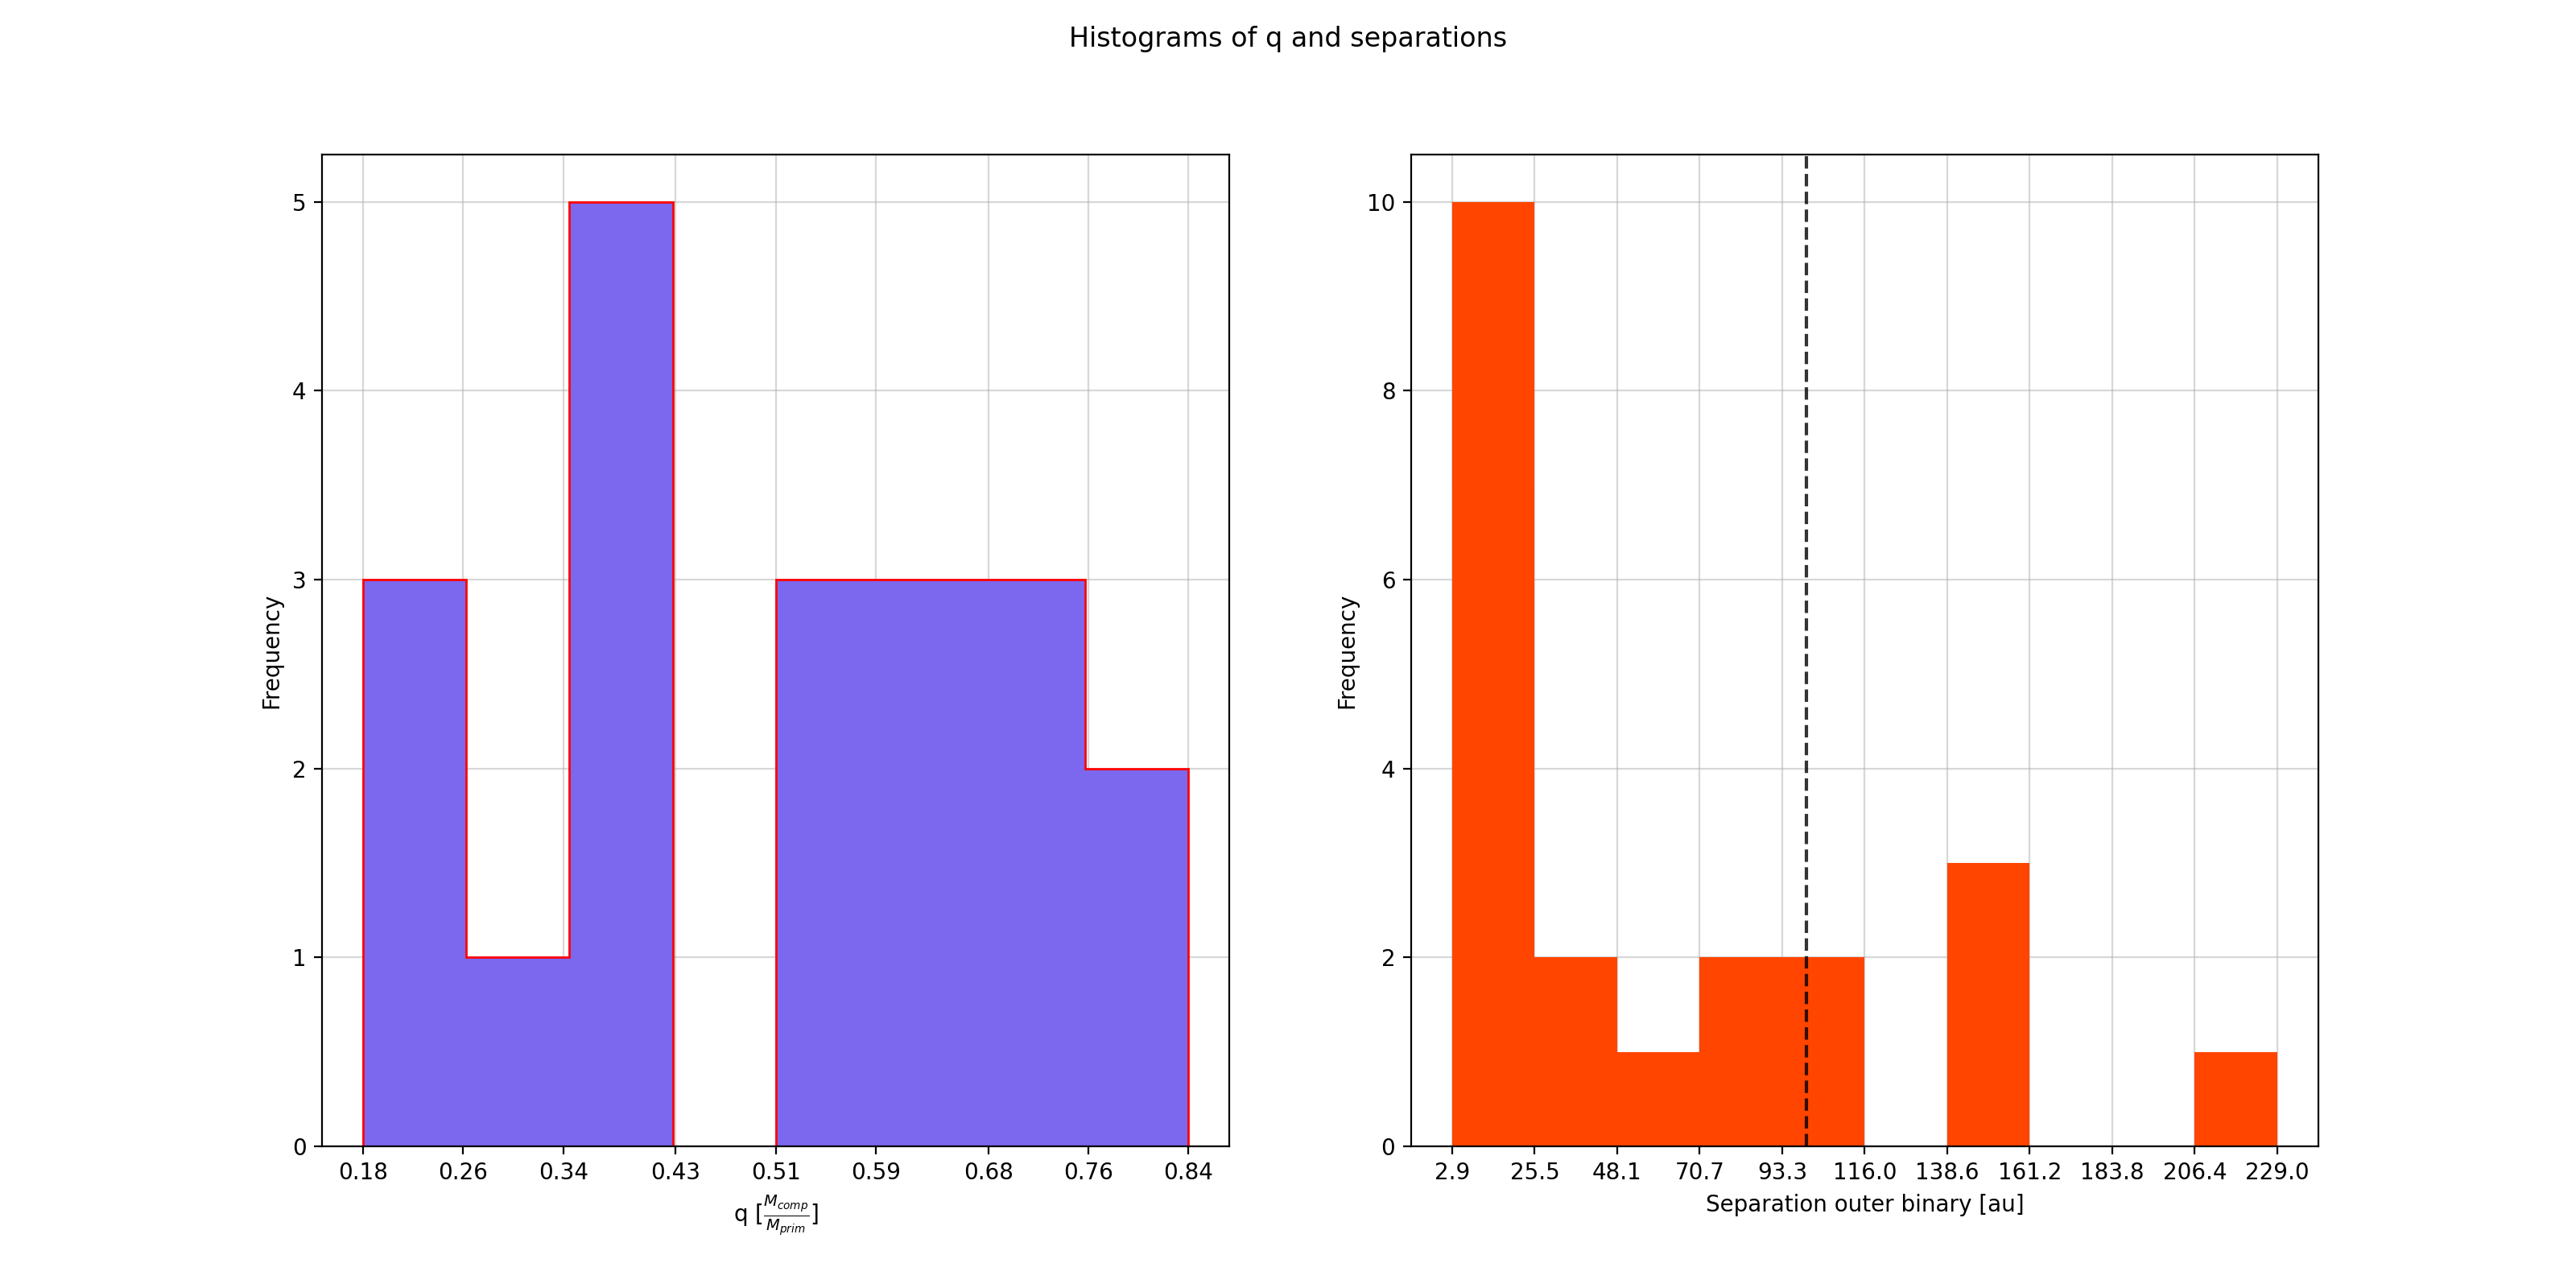

In [24]:
##### import scipy
import matplotlib as m
import scipy.stats as stats
from matplotlib.patches import Patch

print(len(mass_r))
# Cumulative distributions
mu = 200
sigma = 25
n_bins = np.shape(mass_r)[0]
x=mass_r

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(14, 20))
# axs = fig.subplots(1, 2, sharex=True, sharey=True)

#cumulative histogram
n, bins, patches = ax1.hist(x, n_bins, density=True, cumulative=1, histtype='step',linewidth=3.,color='#0000FF', label='Observed distribution')
# ax.scatter(x,bins, label="observed")
# print(n)
# ax1.invert_xaxis()


#expected distribution
params = stats.lognorm.fit(np.sort(x))
print(params)
arg = params[:-2]
loc = params[-2]
scale = params[-1]

print(bins[::-1])
print ("Mu=", np.log(scale))
print("Sigma=", arg) # mu and sigma


cdf = stats.lognorm.cdf(x, loc=loc, scale=scale,*arg)   #sf :bins[::-1]
# print(np.sort(ppf)[::-1])
# print(np.sort(x)[::-1])
ax1.plot(np.sort(x),cdf,label=r'Lognormal distribution:'+'\n'+'$\mu$='+str(round(np.log(scale),2))+', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=1.5)

#########################POWERLAW#####################

a_Sana = 0.9
mean, var, skew, kurt = stats.powerlaw.stats(a_Sana, moments='mvsk')
x = np.linspace(stats.powerlaw.cdf(0, a_Sana),stats.powerlaw.cdf(1, a_Sana), len(mass_r))   #ppf > 1 to 0 


error_min=np.linspace(stats.powerlaw.cdf(0, 1.5),stats.powerlaw.cdf(1, 1.5), len(mass_r))
error_max=np.linspace(stats.powerlaw.cdf(0, 0.3),stats.powerlaw.cdf(1, 0.3), len(mass_r))


ax1.plot(x, stats.powerlaw.cdf(x, a_Sana), color='#D84438', linestyle='--',alpha=0.6, label=r'Powerlaw distribution: $q^{\gamma}, \gamma=-0.1$')
ax1.fill_between(x,stats.powerlaw.cdf(x, a_Sana-0.6),stats.powerlaw.cdf(x, a_Sana+0.6),color='#FA8775',edgecolor='#FFB14E',hatch='///',alpha=0.2,label=r'$\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=-0.1\pm0.6$'+'\n'+'Sana et al. 2012')

rv = stats.powerlaw(a)
# ax1.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')


###########TEST##########
# a=1.5
# fit_power = stats.powerlaw.fit(np.sort(bins))
# print('FIIIIT',fit_power)
# ax1.plot(bins, stats.powerlaw.ppf(x, a),color='#FFB14E',lw=2,label=r'Best-fit $q^{\gamma}, \gamma=-0.1$')
#########################

ax1.axvspan(0, 0.18, alpha=0.4, color='red',label=r'$\Delta mag \leq 4mag$')

handles, labels = ax1.get_legend_handles_labels()
# handles.append(Patch(facecolor='#FA8775', edgecolor='#FA8775',hatch='\\\\',alpha=0.2))
# labels.append(r'$\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=-0.1\pm0.6$'+'\n'+'Sana et al. 2012')


ax1.grid(True)
ax1.legend(handles,labels,loc='lower right')#,framealpha=0.2)
ax1.set_title('Cumulative distribution of all mass ratios q')
ax1.set_xlabel(r'q [$\frac{M_{3}}{M_{1}+M_{2}}$]')
ax1.set_ylabel('Likelihood of occurrence')
# ax1.set_xticks(bins[::-2],bins[::-2])
ax1.set_xlim(0.12,1.155)


###########REVERSE CUMULATIVE DISTRIBUTION MASS RATIOS###################
n_bins = np.shape(mass_r)[0]-1
x=mass_r
n, bins, patches = ax2.hist(x, n_bins, density=True, cumulative=-1, histtype='step',linewidth=3.,color='#0000FF', label='Observed distribution')
sf = stats.lognorm.sf(bins, loc=loc, scale=scale,*arg)
ax2.plot(bins,sf,label=r'Lognormal distribution:'+'\n'+'$\mu$='+str(round(np.log(scale),2))+', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=1.5)

x = np.linspace(stats.powerlaw.ppf(1, a_Sana),stats.powerlaw.ppf(0, a_Sana), len(mass_r)) 
ax2.plot(bins, stats.powerlaw.ppf(x, a_Sana), color='#D84438', linestyle='--',alpha=0.6, label=r'Powerlaw distribution: $q^{\gamma}, \gamma=-0.1$')
ax2.fill_between(bins,stats.powerlaw.ppf(x, a_Sana-0.6),stats.powerlaw.ppf(x, a_Sana+0.6),color='#FA8775',edgecolor='#FFB14E',hatch='///',alpha=0.2,label=r'$\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=-0.1\pm0.6$'+'\n'+'Sana et al. 2012')

ax2.axvspan(0, 0.15, alpha=0.4, color='red',label=r'$\Delta mag \leq 4mag$')

handles, labels = ax2.get_legend_handles_labels()

ax2.grid(True)
ax2.legend(handles,labels,loc='upper right')#,framealpha=0.2)
ax2.set_title('Reverse cumulative distribution of all mass ratios q')
ax2.set_xlabel(r'q [$\frac{M_{3}}{M_{1}+M_{2}}$]')
ax2.set_ylabel('Likelihood of occurrence')
ax2.set_xlim(0.12,1.10)

#####################################################
# Cumulative distributions
mu = 200
sigma = 25
n_bins = np.shape(sep_pio)[0]-1
x=np.array(sep_pio)

#cumulative histogram
n, bins, patches = ax3.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True,linewidth=3.,color='#0000FF', label='Observed distribution')

#expected distribution
params = stats.lognorm.fit(x)
print(params)
arg = params[:-2]
loc = params[-2]
scale = params[-1]


cdf = stats.lognorm.cdf(np.sort(x), loc=loc, scale=scale,*arg)
# ax3.plot(np.sort(x),cdf,label=r'Lognormal distribution:' +'\n'+'$\mu$='+str(round(np.log(scale),2))+r', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=1.5)

########POWERLAW########

a=0.3
x = np.linspace(stats.powerlaw.cdf(0, a),stats.powerlaw.cdf(1, a), len(bins))
# fit_power = stats.powerlaw.fit(np.sort(bins))
# print('FIIIIT',fit_power)
ax3.plot(bins, stats.powerlaw.cdf(x, a),color='#FFB14E',lw=2,label=r'Best-fit $q^{\gamma}, \gamma=-0.7$')
ax3.axvspan(0, 2, alpha=0.4, color='red',label='Drop in PIONIER\'s sensitivity')

ax3.grid(True)
ax3.legend(loc='lower right')
ax3.set_xlim(0,228)
# ax2.legend(handles,labels,loc='right')
ax3.set_ylabel('Likelihood of occurrence')
ax3.set_title('Cumulative distribution of all outer separations ')
ax3.set_xlabel('Separation out [au]')

########################LOGARITHMIC#############################
# Cumulative distributions
mu = 200
sigma = 25
n_bins = np.shape(sep_pio)[0]-1
x=np.array(sep_pio)

#cumulative histogram
n, bins, patches = ax4.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True,linewidth=3.,color='#0000FF', label='Observed distribution')

#expected distribution
params = stats.lognorm.fit(x)
print(params)
arg = params[:-2]
loc = params[-2]
scale = params[-1]


cdf = stats.lognorm.cdf(np.sort(x), loc=loc, scale=scale,*arg)
ax4.plot(np.sort(x),cdf,label=r'Lognormal distribution:' +'\n'+'$\mu$='+str(round(np.log(scale),2))+r', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=1.5)

########POWERLAW########

a=0.3
x = np.linspace(stats.powerlaw.cdf(0, a),stats.powerlaw.cdf(1, a), len(bins))
ax4.plot(bins, stats.powerlaw.cdf(x, a),color='#FFB14E',lw=2,label=r'Best-fit $q^{\gamma}, \gamma=-0.7$')
ax4.axvspan(0.5, 2, alpha=0.4, color='red',label='Drop in PIONIER\'s sensitivity')

ax4.grid(True)
ax4.legend()
ax4.set_xlim(0.5,228)
# ax2.legend(handles,labels,loc='right')
ax4.set_title('Cumulative distribution of all outer separations ')
ax4.set_ylabel('Likelihood of occurrence')
ax4.set_xlabel('Separation out [au]')
ax4.set_xscale('log')

####################MASSES#################
mu = 200
sigma = 25
n_bins1 = np.shape(mass_prim)[0]-1
n_bins2= np.shape(mass_comp)[0]-1

#cumulative histogram
n1, bins1, patches1 = ax5.hist(mass_prim, n_bins1, density=True, cumulative=1, histtype='step',linewidth=3.,color='#0000FF', label=r'Observed distribution, $M_{1+2}$')
n2, bins2, patches2 = ax5.hist(mass_comp, n_bins2, density=True, cumulative=1, histtype='step',linewidth=3.,color='#E5B0FB', label=r'Observed distribution, $M_{3}$')


# powerlaw
a1=0.65
x1 = np.linspace(stats.powerlaw.cdf(0, a1),stats.powerlaw.cdf(1, a1), len(bins1))
ax5.plot(bins1, stats.powerlaw.cdf(x1, a1),color='#FFB14E',lw=2,label=r'Best-fit $q^{\gamma}, \gamma=-0.35$')

a2=1.35
# bins2=bins2[:-1]
# x = np.linspace(stats.powerlaw.cdf(0, a1),stats.powerlaw.cdf(1, a), len(bins1))
# x2 = np.linspace(stats.powerlaw.cdf(0, -a2),stats.powerlaw.cdf(1, -a2), len(bins2))
# ax5.plot(bins2, stats.powerlaw.cdf(x2, -a2),color='tomato',lw=2,label=r'Best-fit $q^{\gamma}, \gamma=-0.5$')

def salpeter(bins):
    imf=[]
    for i in range (len(bins)):
        imf.append(bins[i]**(-2.35))
        
    return imf
        

print("BIINS2",bins2)

ax5.grid(True)
ax5.legend(loc='best')

# ax5.set_xlim(0.5,228)
# ax5.legend(handles,labels,loc='right')

ax5.set_title('Cumulative distribution of masses')
ax5.set_ylabel('Likelihood of occurrence')
ax5.set_xlabel(r'Mass [$M_{\odot}$]')

ax6.remove()

# plt.savefig('distributions_triples.png',dpi=400)

fig2, (ax0,ax1) = plt.subplots(1,2,figsize=(16,8))

bins_q=8
x=mass_r
n, binsq, edges = ax0.hist(x, bins_q, histtype='stepfilled', color="mediumslateblue",ec='red',stacked=True,zorder=2)#, fill=False)

sep=[]
for i in range (0,len(triples_pionier['Target']),2):
    if triples_pionier['Triple'][i]=='Y':
        sep.append(triples_pionier['Sep (au)'][i+1])
    
# print(len(sep))

bins_sep=10
x2=sep
n, binsep, edges=ax1.hist(x2, bins_sep,histtype='bar', color="orangered",stacked=True,zorder=2)#, fill=False)

ax0.grid(axis='y', alpha=0.5, zorder=0)
ax0.grid(axis='x',alpha=0.5,zorder=0)
ax0.set_ylabel('Frequency')
ax0.set_xticks(np.around(binsq,2))
ax0.set_xlabel(r'q [$\frac{M_{comp}}{M_{prim}}$]')

ax1.grid(axis='y', alpha=0.5, zorder=0)
ax1.grid(axis='x',alpha=0.5,zorder=0)
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.around(binsep,2))
ax1.set_xlabel(r'Separation outer binary [au]')
ax1.axvline(100,linestyle="--",color='black',alpha=0.8)

fig2.suptitle('Histograms of q and separations')
# plt.savefig('histogram_triples.png',dpi=400)


plt.show()

<IPython.core.display.Javascript object>


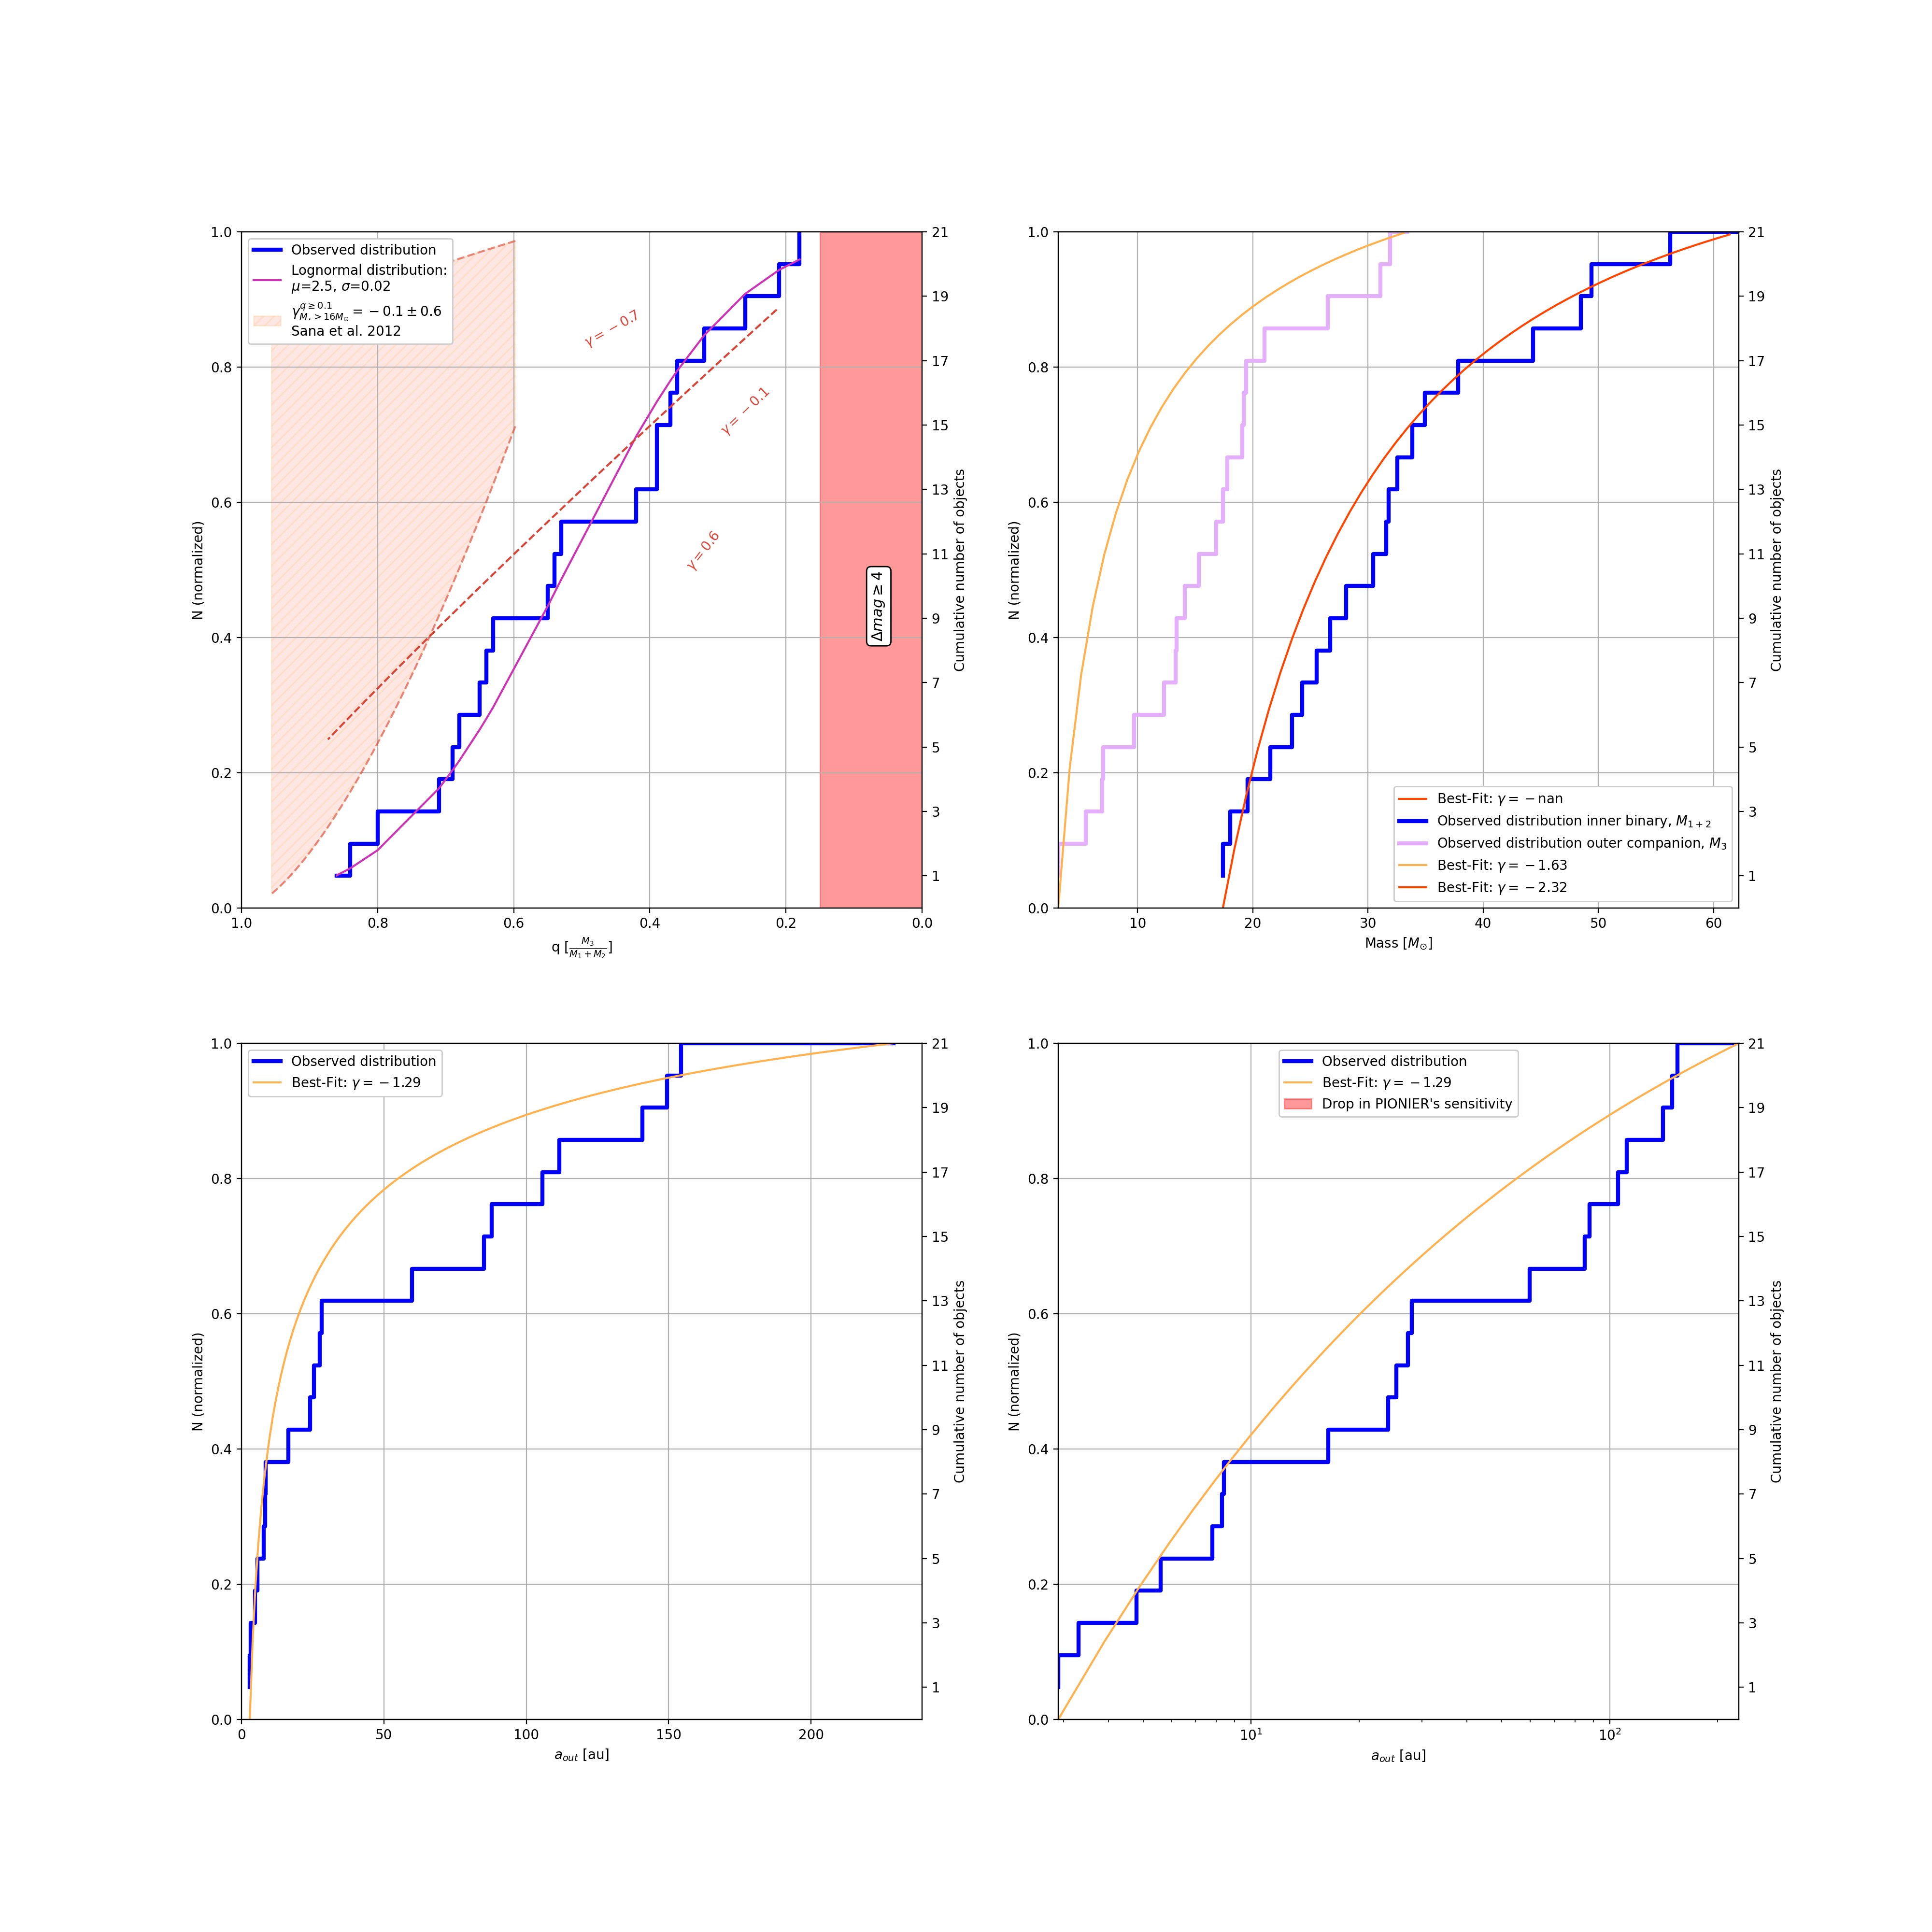

/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:1170: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:1188: RuntimeWarning: invalid value encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:862: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:867: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/ebordier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
Not enough data. Returning nan
Not enoug

21


In [35]:
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
import powerlaw
import scipy.stats as stats
from matplotlib.patches import Patch

fig, ((ax1,ax3),(ax5,ax7)) = plt.subplots(2,2,figsize=(20, 20))
data = mass_ratio
sorted_data=np.sort(data)

number_systems=len(sep_pio)

#evaluate the cumulative
y=np.arange(start=1,stop=sorted_data.size+1)
ax1.plot(sorted_data, y[::-1]/sorted_data.size,drawstyle='steps',linewidth=3.,color='#0000FF', label='Observed distribution')  # From 0 to the number of data points-1
# plt.scatter(sorted_data[::-1], np.arange(start=1,stop=sorted_data.size+1))
# ax1.plot(sorted_data, np.arange(start=1,stop=sorted_data.size+1)/sorted_data.size, 'o--', color='grey', alpha=0.3)
ax1.set_xlim(0,max(data)+0.02)
ax1.set_ylim(0,1.0)

ax2 = ax1.twinx()  
# ax2.plot(sorted_data,y[::-1],drawstyle='steps',linewidth=3.,color='#0000FF', label='Observed distribution')
# ax1.set_ylim(0,1.0)
# ax2.remove()
# n_np, bins_np = np.histogram(sorted_data, len(mass_r))
ax2.set_ylim(0,number_systems)

###LOGNORMAL
params = stats.lognorm.fit(sorted_data[::-1])
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.lognorm.sf(sorted_data, loc=loc, scale=scale,*arg)   #sf :bins[::-1]
ax1.plot(sorted_data,cdf,label=r'Lognormal distribution:'+'\n'+'$\mu$='+str(round(np.log(scale),2))+', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=1.5)

######POWERLAW
a_Sana = 0.9
x = np.linspace(stats.powerlaw.cdf(np.min(sorted_data), a_Sana),stats.powerlaw.cdf(np.max(sorted_data), a_Sana), 1000)   #ppf > 1 to 0 
x1 = np.linspace(stats.powerlaw.cdf(np.min(sorted_data), a_Sana-0.6),stats.powerlaw.cdf(np.max(sorted_data), a_Sana-0.6), 1000)   #ppf > 1 to 0 
x2= np.linspace(stats.powerlaw.cdf(np.min(sorted_data), a_Sana+0.6),stats.powerlaw.cdf(np.max(sorted_data), a_Sana+0.6), 1000)   #ppf > 1 to 0 
# x2=np.linspace(np.min(sorted_data),np.max(sorted_data),1000)

ax1.plot(x, stats.powerlaw.cdf(x,a_Sana)[::-1], color='#D84438', linestyle='--')#, label=r'$q^{\gamma}, \gamma=-0.1$')
ax1.plot(x1, stats.powerlaw.cdf(x1,a_Sana-0.6)[::-1], color='#D84438', linestyle='--',alpha=0.6)#, label=r'Powerlaw distribution: $q^{\gamma}, \gamma=-0.1$')
ax1.plot(x1, stats.powerlaw.cdf(x2,a_Sana+0.6)[::-1], color='#D84438', linestyle='--',alpha=0.6)#, label=r'Powerlaw distribution: $q^{\gamma}, \gamma=-0.1$')
ax1.fill_between(x1,stats.powerlaw.cdf(x1, a_Sana-0.6)[::-1],stats.powerlaw.cdf(x2, a_Sana+0.6)[::-1],color='#FA8775',edgecolor='#FFB14E',hatch='///',alpha=0.2,label=r'$\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=-0.1\pm0.6$'+'\n'+'Sana et al. 2012')

x=np.arange(np.min(sorted_data),np.max(sorted_data),1)
results=powerlaw.Fit(xmin=np.min(sorted_data),xmax=np.max(sorted_data),data=x)#,parameter_range=)
ax3.plot(x,results.power_law.cdf(),color='orangered',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))

ax1.axvspan(0, 0.15, alpha=0.4, color='red',zorder=0)#,label=r'$\Delta mag \leq 4mag$')

handles, labels = ax1.get_legend_handles_labels()
# handles.append(Patch(facecolor='#FA8775', edgecolor='#FA8775',hatch='\\\\',alpha=0.2))
# labels.append(r'$\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=-0.1\pm0.6$'+'\n'+'Sana et al. 2012')
ax1.text(0.075,0.4,r'$\Delta mag\geq4$',size=11, rotation=90,ma='center',bbox=dict(boxstyle='round', facecolor='white'))#, ec="0.5")#,alpha=0.8))



ax1.grid(True)
legend=ax1.legend(handles,labels,loc='upper left')#,framealpha=0.2)
legend.get_frame().set_alpha(None)
# ax1.set_title('Cumulative distribution of all mass ratios q')
ax1.set_xlabel(r'q [$\frac{M_{3}}{M_{1}+M_{2}}$]')
ax1.set_ylabel('N (normalized)')
ax2.set_ylabel('Cumulative number of objects')
ax2.set_yticks(np.around(y,2)[::2])#[::3])
ax1.set_xlim(0.,1)

ax1.text(0.3, 0.7, r"$\gamma=-0.1$", color='#D84438',size=10, rotation=44)
ax1.text(0.5, 0.83, r"$\gamma=-0.7$", color='#D84438',size=10, rotation=29)
ax1.text(0.35, 0.50, r"$\gamma=0.6$", color='#D84438',size=10, rotation=52)

plt.gca().invert_xaxis()

####################MASSES######################
sorted_data_prim=np.sort(mass_prim)
y_prim=np.arange(start=1,stop=sorted_data_prim.size+1)
ax3.plot(sorted_data_prim, y_prim/sorted_data_prim.size, drawstyle='steps-mid',linewidth=3.,color='#0000FF', label=r'Observed distribution inner binary, $M_{1+2}$')

sorted_data_comp=np.sort(mass_comp)
y_comp=np.arange(start=1,stop=sorted_data_comp.size+1)
ax3.plot(sorted_data_comp, y_comp/sorted_data_comp.size, drawstyle='steps',linewidth=3.,color='#E5B0FB', label=r'Observed distribution outer companion, $M_{3}$')

# a_Sana = -2.35
# x = np.linspace(stats.powerlaw.cdf(np.min(sorted_data_comp), a_Sana),stats.powerlaw.cdf(np.max(sorted_data_prim), a_Sana), 1000) 
# ax3.plot(x, stats.powerlaw.cdf(x,a_Sana), color='#D84438', linestyle='--',alpha=0.6)
# print(stats.powerlaw.cdf(x,a_Sana))

x_comp=np.arange(np.min(sorted_data_comp),np.max(sorted_data_comp),1)
# print(x,len(x))
results=powerlaw.Fit(xmin=np.min(sorted_data_comp),xmax=np.max(sorted_data_comp),data=x_comp)#,parameter_range=)
ax3.plot(x_comp,results.power_law.cdf(),color='#FFB14E',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))

x_prim=np.arange(np.min(sorted_data_prim),np.max(sorted_data_prim),1)
# print(x,len(x))
results=powerlaw.Fit(xmin=np.min(sorted_data_prim),xmax=np.max(sorted_data_prim),data=x_prim)#,parameter_range=)
ax3.plot(x_prim,results.power_law.cdf(),color='orangered',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))

# theoretical_distribution=powerlaw.Distribution(xmin=np.min(sorted_data_comp),xmax=60, parameter_range=[2.35],data=x)
# print(theoretical_distribution.cdf())

# simulated_data=theoretical_distribution.generate_random(100)
# print(simulated_data)
# # fit=powerlaw.Fit(simulated_data)
# results=powerlaw.Fit(simulated_data)
# ax3.plot(simulated_data,results.power_law.cdf(),color='#D84438',label=r'Salpeter: $\alpha=-2.35$')

ax3.grid(True)
legend=ax3.legend(loc='best')
legend.get_frame().set_alpha(None)

# ax5.set_xlim(0.5,228)
# ax5.legend(handles,labels,loc='right')

# ax3.set_title('Cumulative distribution of masses')
ax3.set_ylabel('N (normalized)')
ax3.set_xlabel(r'Mass [$M_{\odot}$]')
ax3.set_ylim(0,1.)
ax3.set_xlim(np.min(sorted_data_comp),np.max(sorted_data_prim))
# ax6.remove()

ax4 = ax3.twinx()  
ax4.set_ylim(np.min(y_prim), np.max(y_prim))
ax4.set_ylabel('Cumulative number of objects')
ax4.set_ylim(0,number_systems)
ax4.set_yticks(np.around(y_comp,2)[::2])
# ax4.axhline(1.,linestyle=':')


############SEPARATIONS###########
data = sep_pio
sorted_data=np.sort(data)

#evaluate the cumulative
y=np.arange(start=1,stop=sorted_data.size+1)
print(len(y))
ax5.plot(sorted_data, y/sorted_data.size,drawstyle='steps',linewidth=3.,color='#0000FF', label='Observed distribution')

x=np.arange(np.min(sorted_data),np.max(sorted_data),1)
# print(x,len(x))
results=powerlaw.Fit(xmin=np.min(sorted_data),xmax=np.max(sorted_data),data=x)#,parameter_range=)
ax5.plot(x,results.power_law.cdf(),color='#FFB14E',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))

ax6 = ax5.twinx()  
# ax6.set_ylim(0, np.max(y))
ax6.set_ylabel('Cumulative number of objects')
ax6.set_ylim(0,number_systems)
ax5.set_ylim(0,1.)
ax6.set_yticks(np.around(y,2)[::2])

# ax5.set_title('Cumulative distribution of masses')
ax5.set_ylabel('N (normalized)')
ax5.set_xlabel(r'$a_{out}$ [au]')
ax5.set_xlim(0,np.max(sorted_data)+10)

ax5.grid(True)
legend=ax5.legend(loc='best')
legend.get_frame().set_alpha(None)


############SEPARATIONS###########
data = sep_pio
sorted_data=np.sort(data)

#evaluate the cumulative
y=np.arange(start=1,stop=sorted_data.size+1)
ax7.plot(sorted_data, y/sorted_data.size,drawstyle='steps',linewidth=3.,color='#0000FF', label='Observed distribution')

x=np.arange(np.min(sorted_data),np.max(sorted_data),1)
# print(x,len(x))
results=powerlaw.Fit(xmin=np.min(sorted_data),xmax=np.max(sorted_data),data=x)#,parameter_range=)
ax7.plot(x,results.power_law.cdf(),color='#FFB14E',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))
ax7.axvspan(0., 2, alpha=0.4, color='red',label='Drop in PIONIER\'s sensitivity')

ax8 = ax7.twinx()  
ax8.set_ylim(0,number_systems)
ax8.set_ylabel('Cumulative number of objects')
ax8.set_yticks(np.around(y,2)[::2])
# ax8.axhline(1.,linestyle=':')

# ax7.set_title('Cumulative distribution of masses')
ax7.set_ylabel('N (normalized)')
ax7.set_xlabel(r'$a_{out}$ [au]')
ax7.set_xlim(np.min(sorted_data),np.max(sorted_data))
ax7.set_ylim(0,1)

ax7.grid(True)
legend=ax7.legend(loc='upper center')
legend.get_frame().set_alpha(None)
ax7.set_xscale('log')


plt.savefig(dir+'paper/images/CDF_triples2.png',dpi=400)

plt.show()

<IPython.core.display.Javascript object>


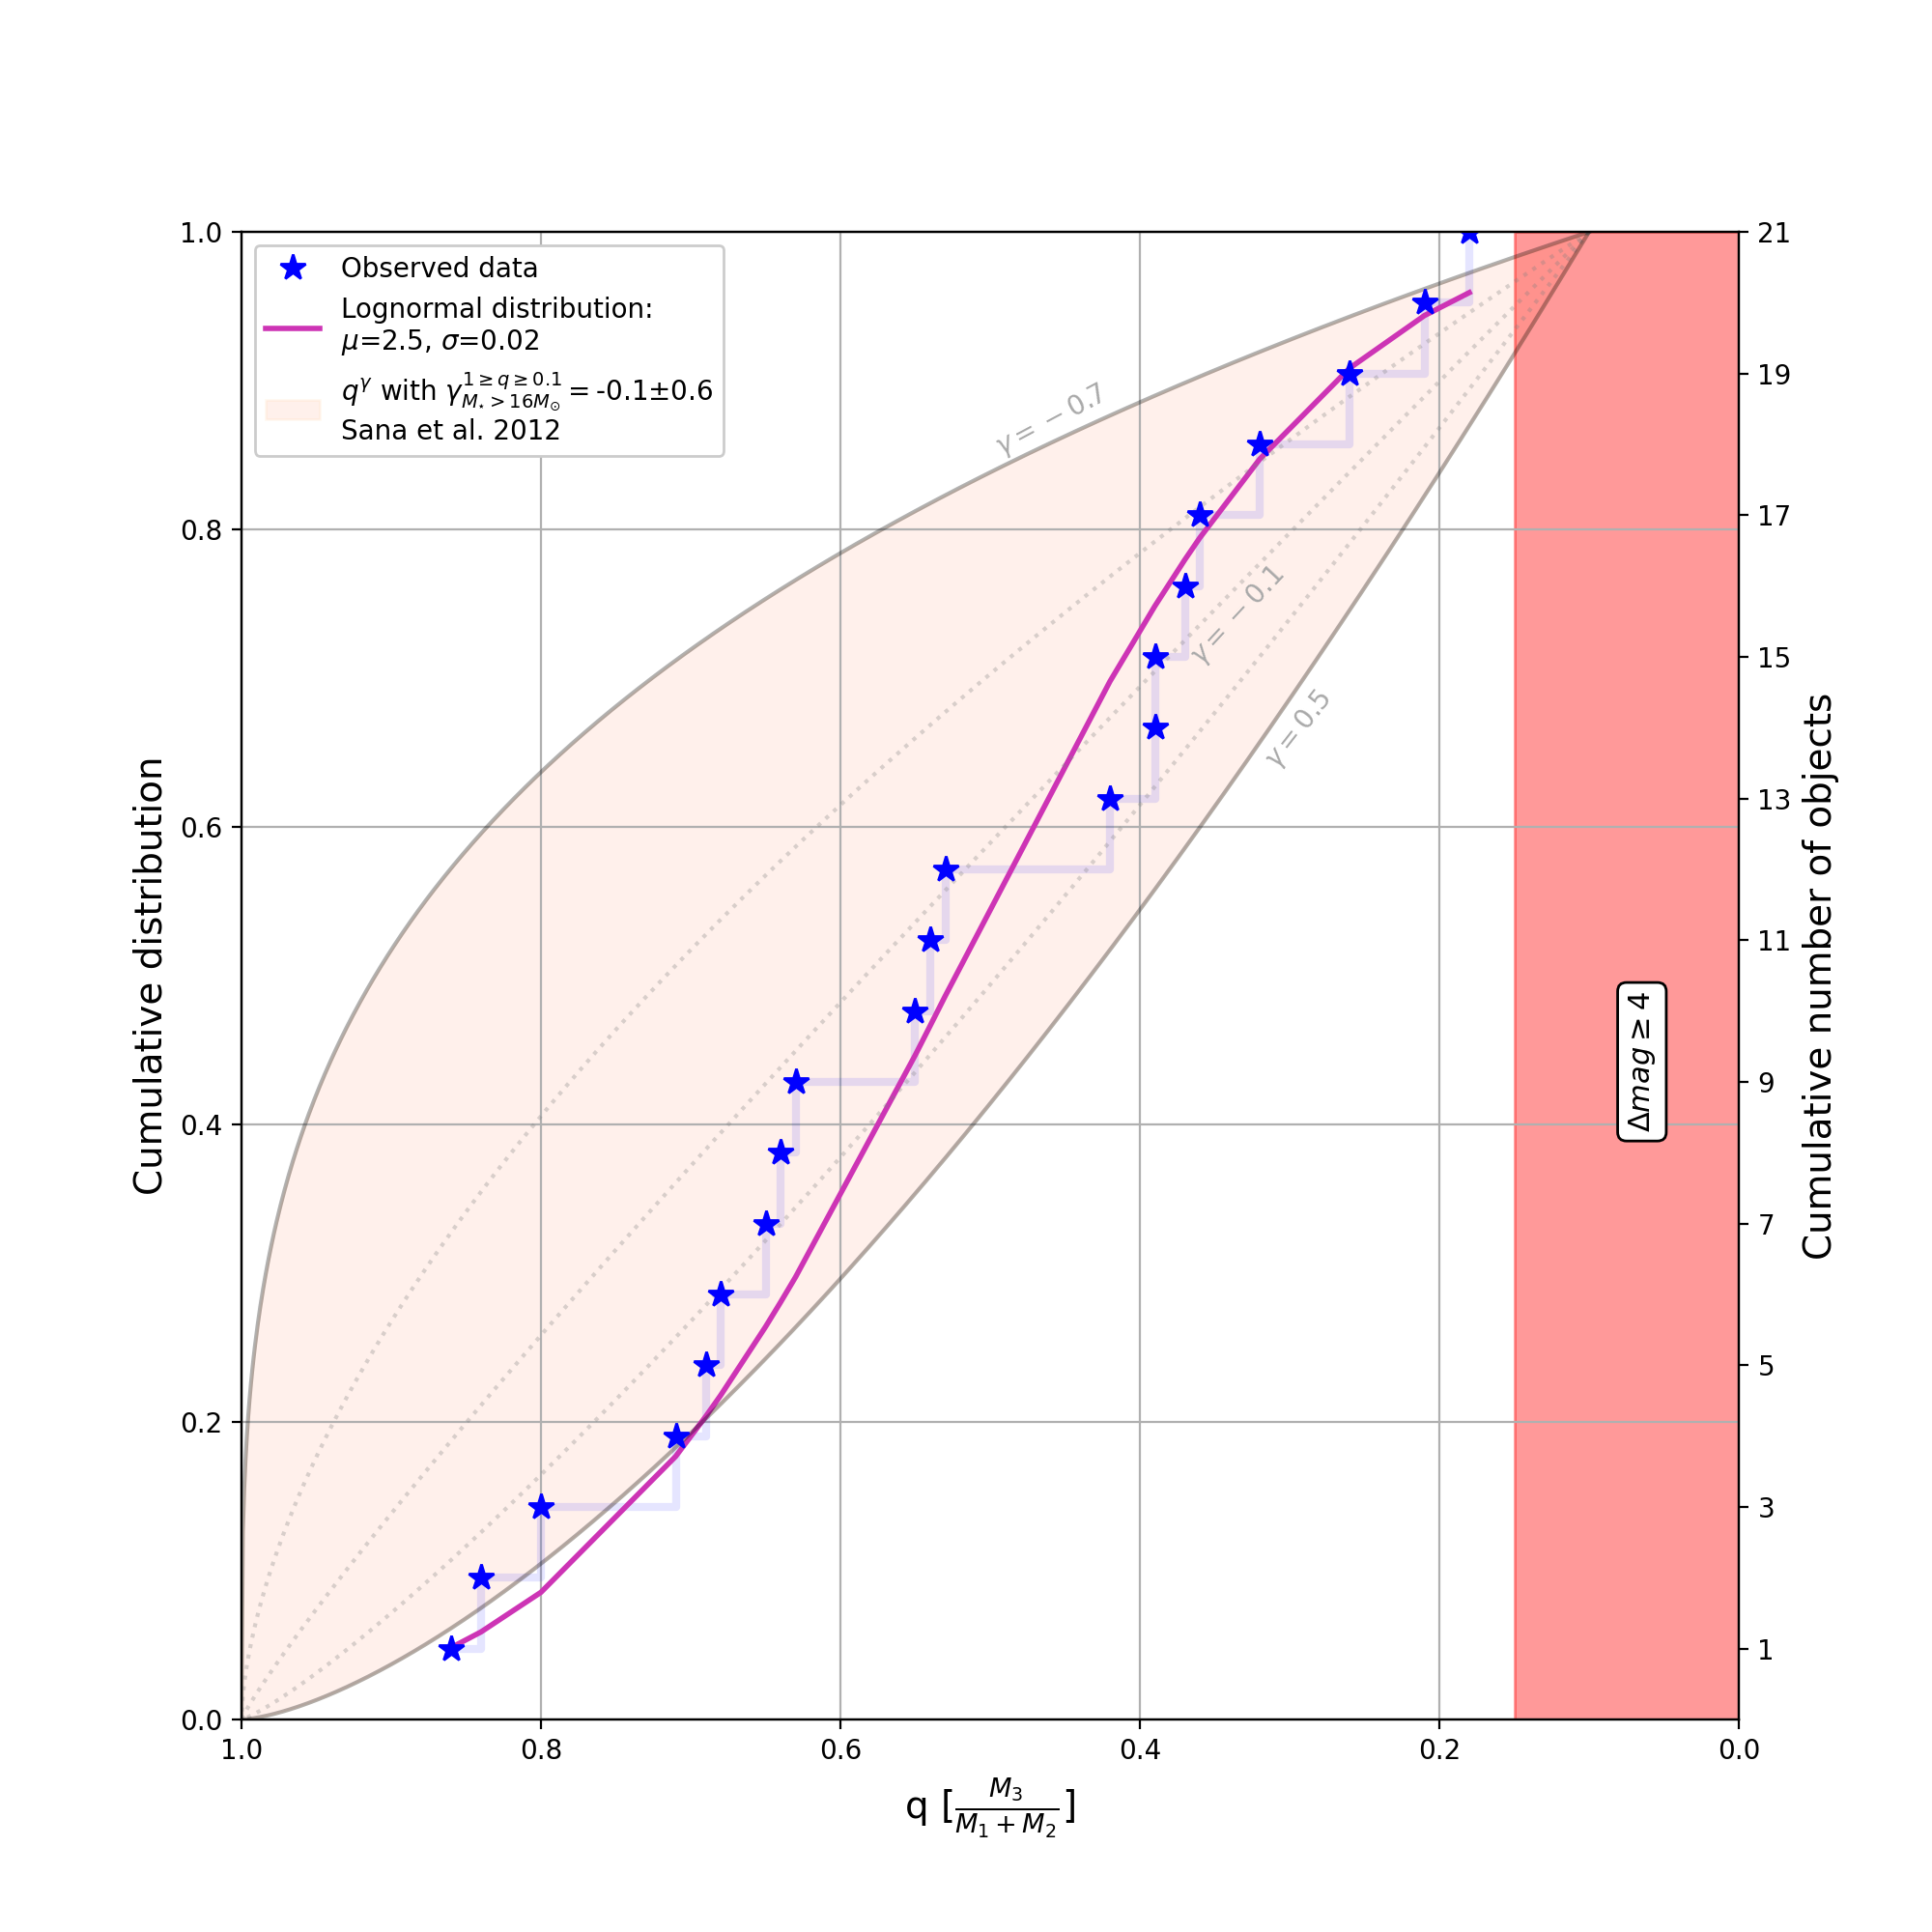

(0.38445419433510186, 0.17999999999999997, 0.6800000000000002)
Calculating best minimal value for power law fit
8.681295480456253
0.63
0.11120503111953352 0.7650353709310339


In [37]:
from pylab import *
from scipy import *
import powerlaw

# powerlaw = lambda x, amp, index: amp * (x**index)

fig,ax1=plt.subplots(1,1,figsize=(10, 10))
data = mass_ratio
sorted_data=np.sort(data)

number_systems=len(sep_pio)

xs=sorted_data
ys=y[::-1]/sorted_data.size
#evaluate the cumulative
y=np.arange(start=1,stop=sorted_data.size+1)
ax1.plot(xs, ys, 'b*', markersize=10, label='Observed data',zorder=5)
ax1.plot(sorted_data, y[::-1]/sorted_data.size,drawstyle='steps-pre',linewidth=3.,alpha=0.1,color='#0000FF')#, label='Observed distribution')  # From 0 to the number of data points-1
ax1.set_xlim(0,max(data)+0.02)
ax1.set_ylim(0,1.0)

ax2 = ax1.twinx()  
ax2.set_ylim(0,number_systems)

params = stats.lognorm.fit(sorted_data[::-1])
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.lognorm.sf(sorted_data, loc=loc, scale=scale,*arg)   #sf :bins[::-1]
ax1.plot(sorted_data,cdf,label=r'Lognormal distribution:'+'\n'+'$\mu$='+str(round(np.log(scale),2))+', $\sigma$='+str(round(arg[0],2)),linestyle='-',color='#CD34B5',lw=2)


# popt_trunc, pcov = curve_fit(F_trunc, xs, ys)
# popt_pl, pcov1 = curve_fit(F, xs, ys)
# print("Truncated Powelaw",popt_trunc)
# print("PowerLaw", popt_pl)

# ax1.plot(xs, F_trunc(xs, *popt_trunc), 'g-', label='Truncated power law distribution'+'\n'+r'$q^{\alpha} e^{\beta q}$, $\alpha=$-0.15, $\beta=$-1.77')#+str(round(-popt_trunc[0],2))+r' and $\beta$='+str(round(-popt_trunc[1],1)))

ax1.axvspan(0, 0.15, alpha=0.4, color='red',zorder=0)#,label=r'$\Delta mag \leq 4mag$')
ax1.text(0.075,0.4,r'$\Delta mag\geq4$',size=11, rotation=90,ma='center',bbox=dict(boxstyle='round', facecolor='white'))#, ec="0.5")#,alpha=0.8))

r =stats.powerlaw.rvs(0.9, size=1000)# stats.exponpow.rvs(0.9, size=1000)
params = stats.powerlaw.fit(sorted_data) #stats.exponpow.fit(sorted_data)
print(params)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.powerlaw.sf(sorted_data, loc=loc, scale=scale,*arg)#stats.exponpow.sf(sorted_data, loc=loc, scale=scale,*arg)
# ax1.plot(sorted_data,cdf,label=r'Best-fit truncated power law '+'\n'+r'distribution: $q^{\alpha} e^{1+q^{\alpha}}$, $\alpha$='+str(np.round(arg[0]-1,2)),color='#CD34B5',lw=2)
# ax1.plot(sorted_data,cdf,color='#CD34B5',lw=2,label='Truncated power law distribution'+'\n'+r'$q^{\alpha} e^{\beta q}$, $\alpha=$-0.15, $\beta=$-1.77')


x=np.linspace(0.1,1,1000)
rv_low=[]
rv_high=[]
for a in [-0.4,0.3,0.6,0.9,1.2,1.5]:
#     x=np.linspace(stats.powerlaw.sf(0.15, a),stats.powerlaw.sf(0.90, a), 500)
#     x=np.linspace(0.1,1.,500)
#     x=np.linspace(stats.powerlaw.cdf(0.1, a),stats.powerlaw.cdf(1., a),1000)
    params = stats.powerlaw.fit(x)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    rv=stats.powerlaw(a, loc=loc, scale=scale)
    if a==0.3:
        rv_low.append(rv)
        lstyle='-'
        c='k'
    elif a==1.5:
        rv_high.append(rv)
        lstyle='-'
        c='k'
    else:
        lstyle=':'
        c='grey'
#     r=stats.powerlaw.rvs(a,300)
    ax1.plot(x, 1-rv.sf(x)[::-1],color=c,linestyle=lstyle,alpha=0.3)
    
# x1 = np.linspace(stats.powerlaw.cdf(np.min(sorted_data), 0.3),stats.powerlaw.cdf(np.max(sorted_data), 0.3), 1000)   #ppf > 1 to 0 
# x2= np.linspace(stats.powerlaw.cdf(np.min(sorted_data), 1.5),stats.powerlaw.cdf(np.max(sorted_data), 1.5), 1000)
# ax1.fill_between(x,stats.powerlaw(0.3,loc=0, scale=1).sf(x1),stats.powerlaw(1.5,loc=0., scale=1).sf(x2),color='#FA8775',edgecolor='#FFB14E',alpha=0.08,label=r'$q^{\gamma}$ with $\gamma_{M_{\star}>16M_{\odot}}^{q\geq0.1}=$'+str(-0.1)+'$\pm0.6$'+'\n'+'Sana et al. 2012') #hatch='///'
ax1.fill_between(x,1-rv_low[0].sf(x)[::-1],1-rv_high[0].sf(x)[::-1],color='orangered',edgecolor='#FFB14E',alpha=0.08,label=r'$q^{\gamma}$ with $\gamma_{M_{\star}>16M_{\odot}}^{1\geq q\geq0.1}=$'+str(-0.1)+'$\pm0.6$'+'\n'+'Sana et al. 2012') #hatch='///'
# x1,stats.powerlaw.cdf(x1, a_Sana-0.6)[::-1],stats.powerlaw.cdf(x2, a_Sana+0.6)[::-1]

results=powerlaw.Fit(sorted_data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('lognormal','power_law')
print(R,p)
# print(stats.lognorm.interval(0.95, sorted_data, loc=0, scale=1))


ax1.grid(True)
handles, labels = ax1.get_legend_handles_labels()
legend=ax1.legend(handles,labels,loc='upper left',fontsize=10)#,framealpha=0.2)
legend.get_frame().set_alpha(None)
# ax1.set_title('Cumulative distribution of all mass ratios q')
ax1.set_xlabel(r'q [$\frac{M_{3}}{M_{1}+M_{2}}$]',fontsize=14)
ax1.set_ylabel('Cumulative distribution',fontsize=14)
ax2.set_ylabel('Cumulative number of objects',fontsize=14)
ax2.set_yticks(np.around(y,2)[::2])#[::3])
ax1.set_xlim(0.,1)

ax1.text(0.37, 0.71, r"$\gamma=-0.1$", color='darkgrey',size=10, rotation=47)
ax1.text(0.5, 0.85, r"$\gamma=-0.7$", color='darkgrey',size=10, rotation=28)
ax1.text(0.32, 0.64, r"$\gamma=0.5$", color='darkgrey',size=10, rotation=52)

plt.gca().invert_xaxis()
plt.savefig(dir+'paper/images/CDF_q_5.png',dpi=400)


In [38]:
print(mass_ratio)

[0.39 0.84 0.64 0.36 0.37 0.32 0.26 0.53 0.63 0.54 0.68 0.39 0.55 0.8
 0.71 0.18 0.69 0.86 0.21 0.65 0.42]


<IPython.core.display.Javascript object>


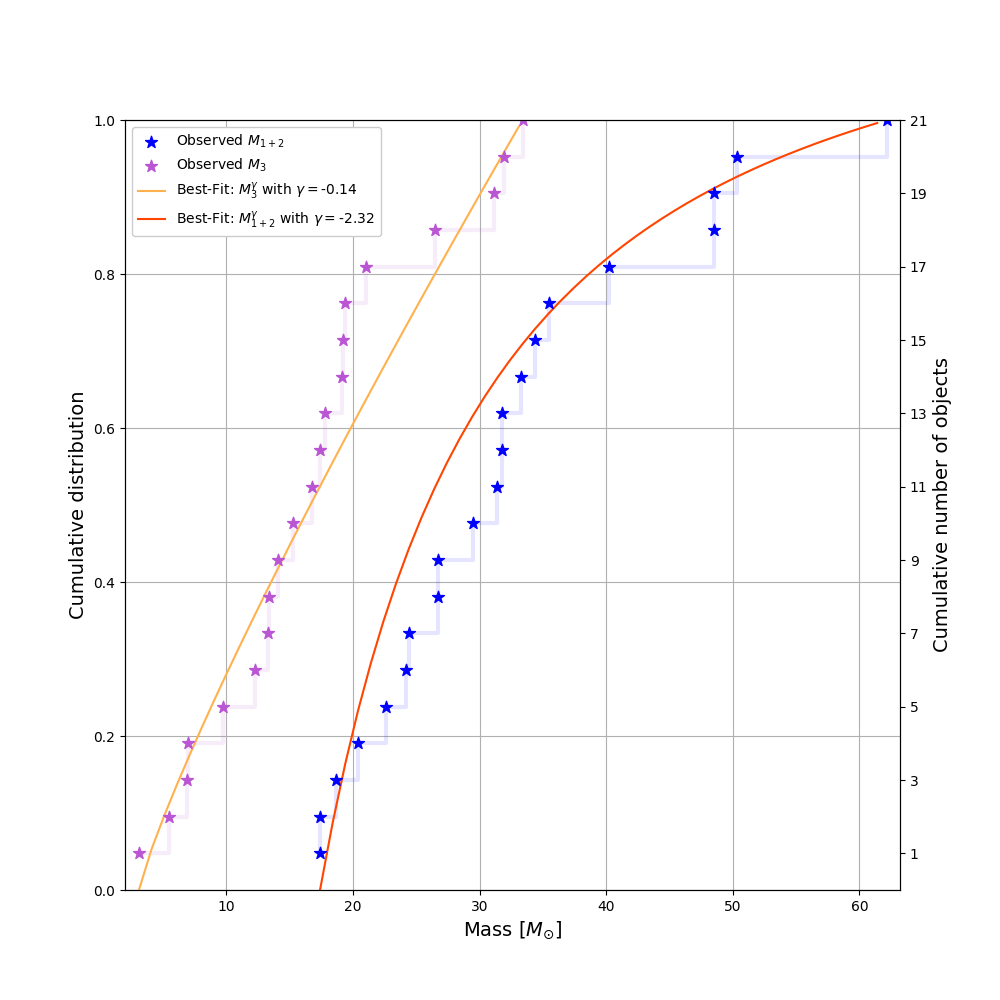

mass min comp 3.1
SIGMA 8.93297036738845
COOMP (0.36646857537623356, 3.0999999999999996, 30.3)
[1.86941418]
[ 2.6742181   4.40232215  5.36175905  5.42925474  7.20963598  8.86296345
  9.48620602  9.5481865   9.98038723 10.71488534 11.62254573 11.98260123
 12.22173549 12.99417088 13.05329896 13.17143473 14.11094838 17.27388976
 19.85304142 20.29630323 21.12354402]
YP [0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429
 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952 0.57142857
 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381 0.85714286
 0.9047619  0.95238095 1.        ]
PRIM [0.8164881]
PRIIIM (0.21255709810384685, 17.399999999999995, 44.80000000000002)


In [37]:
######################MASSES#################################
fig,ax1=plt.subplots(1,1,figsize=(10, 10))

sorted_data_prim=np.sort(mass_prim)
y_prim=np.arange(start=1,stop=sorted_data_prim.size+1)

ax1.scatter(sorted_data_prim, y_prim/sorted_data_prim.size, marker='*',s=80,color='#0000FF', label=r'Observed $M_{1+2}$',zorder=5)
ax1.plot(sorted_data_prim, y_prim/sorted_data_prim.size, drawstyle='steps-post',linewidth=3.,alpha=0.1, color='#0000FF')#, label=r'Observed distribution inner binary, $M_{1+2}$')

sorted_data_comp=np.sort(mass_comp)
print('mass min comp', np.min(sorted_data_comp))
y_comp=np.arange(start=1,stop=sorted_data_comp.size+1)
ax1.scatter(sorted_data_comp, y_comp/sorted_data_comp.size, marker='*',s=80,color='mediumorchid', label=r'Observed $M_{3}$',zorder=5)
ax1.plot(sorted_data_comp, y_comp/sorted_data_comp.size, drawstyle='steps-post',linewidth=3.,alpha=0.1,color='mediumorchid')#, label=r'Observed distribution outer companion, $M_{3}$')

# a_Sana = -2.35
# x = np.linspace(stats.powerlaw.cdf(np.min(sorted_data_comp), a_Sana),stats.powerlaw.cdf(np.max(sorted_data_prim), a_Sana), 1000) 
# ax3.plot(x, stats.powerlaw.cdf(x,a_Sana), color='#D84438', linestyle='--',alpha=0.6)
# print(stats.powerlaw.cdf(x,a_Sana))

ax2 = ax1.twinx()  
ax2.set_ylim(0,number_systems)


x_comp=np.arange(np.min(sorted_data_comp),np.max(sorted_data_comp),1)
# print(x,len(x))

params=stats.powerlaw.fit(sorted_data_comp)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.powerlaw.cdf(x_comp, loc=loc, scale=scale,*arg)
# print(len(x_comp),len(cdf))
print('SIGMA',stats.powerlaw.std(0.86,loc=loc, scale=scale))
ax1.plot(x_comp,stats.powerlaw(0.86,loc=loc, scale=scale).cdf(x_comp),color='#FFB14E',label=r'Best-Fit: $M_{3}^{\gamma}$ with $\gamma=$'+str(0.86-1))#+str(round(arg[0]-1,2)))#+str(round(results.alpha,2)))
# ax1.fill_between(x_comp,stats.powerlaw(0.46,loc=loc, scale=scale).cdf(x_comp),stats.powerlaw(1.16,loc=loc, scale=scale).cdf(x_comp),color='#FFB14E',alpha=0.1)

print('COOMP',params)

x0=np.min(sorted_data_prim)
def F(x, a):
    return np.power(x, a-1)
#     return np.power((x-x0)+1, -a)# * np.exp(-b*(x-x0))
popt, pcov = curve_fit(F, sorted_data_comp, y_comp)
print(popt)
print(F(sorted_data_comp, *popt))
# ax2.plot(sorted_data_comp,F(sorted_data_comp, *popt),color='mediumaquamarine',label='test')
yp=y_prim/sorted_data_prim.size
print('YP',yp)
# results=powerlaw.Fit(xmin=np.min(sorted_data_comp),xmax=np.max(sorted_data_comp),data=x_comp)#,parameter_range=)
# ax1.plot(x_comp,results.power_law.cdf(),color='#FFB14E',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))
popt, pcov = curve_fit(F, sorted_data_prim, yp)
print("PRIM",popt)
# ax1.plot(sorted_data_prim,F(sorted_data_prim, *popt),color='mediumaquamarine',label='test')
# ax2.plot(sorted_data_prim,F(sorted_data_prim, *popt),color='mediumaquamarine',label='test')


x_prim=np.arange(np.min(sorted_data_prim),np.max(sorted_data_prim),1)
# print(x,len(x))
theoretical_distribution=powerlaw.Power_Law(xmin=np.min(sorted_data_prim),parameters=[-2.32],discrete=False)
print(theoretical_distribution)
sim=theoretical_distribution.generate_random(1000)



results=powerlaw.Fit(xmin=np.min(sorted_data_prim),xmax=np.max(sorted_data_prim),data=x_prim)#,parameter_range=)
ax1.plot(x_prim,results.power_law.cdf(),color='orangered',label=r'Best-Fit: $M_{1+2}^{\gamma}$ with $\gamma=$'+str(round(-results.alpha,2)))


params=stats.powerlaw.fit(sorted_data_prim)
print("PRIIIM",params)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.powerlaw.cdf(sorted_data_prim, loc=loc, scale=scale,*arg)
# ax1.plot(x_prim,stats.powerlaw(0.37,loc=loc, scale=scale).cdf(x_prim),color='pink',label=r'Best-Fit: $\gamma=$'+str(round(arg[0]-1,2)))



# theoretical_distribution=powerlaw.Distribution(xmin=np.min(sorted_data_comp),xmax=60, parameter_range=[2.35],data=x)
# print(theoretical_distribution.cdf())

# simulated_data=theoretical_distribution.generate_random(100)
# print(simulated_data)
# # fit=powerlaw.Fit(simulated_data)
# results=powerlaw.Fit(simulated_data)
# ax3.plot(simulated_data,results.power_law.cdf(),color='#D84438',label=r'Salpeter: $\alpha=-2.35$')

ax1.grid(True)
legend=ax1.legend(loc='best')
legend.get_frame().set_alpha(None)

# ax5.set_xlim(0.5,228)
# ax5.legend(handles,labels,loc='right')

# ax3.set_title('Cumulative distribution of masses')
ax1.set_ylabel('Cumulative distribution',fontsize=14)
ax1.set_xlabel(r'Mass [$M_{\odot}$]',fontsize=14)
ax1.set_ylim(0,1.)
ax1.set_xlim(2,np.max(sorted_data_prim)+1)
# ax6.remove()

# ax2 = ax1.twinx()  
ax2.set_ylim(np.min(y_prim), np.max(y_prim))
ax2.set_ylabel('Cumulative number of objects',fontsize=14)
ax2.set_ylim(0,number_systems)
ax2.set_yticks(np.around(y_comp,2)[::2])

plt.savefig(dir+'paper/images/mass_distributions_m1m2m3.png',dpi=400)
# ax4.axhline(1.,linestyle=':')

<IPython.core.display.Javascript object>


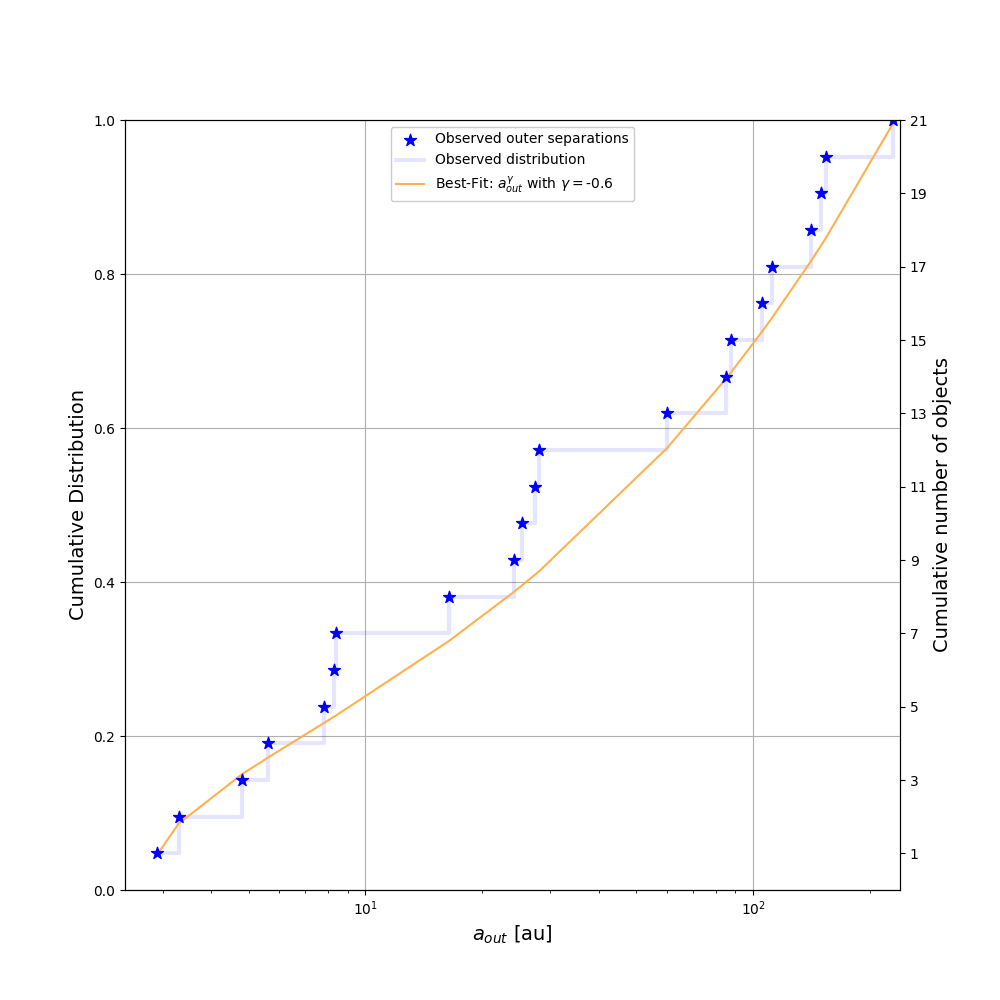

229.0
(0.24496225755857437, 2.8999999999999995, 226.10000000000002)
TRUNC [-0.1424352  -0.00113644]
21


In [55]:
########SEPARATIONS###########
fig,ax7=plt.subplots(1,1,figsize=(10, 10))

data = sep_pio
sorted_data=np.sort(data)
print(np.max(sorted_data))

#evaluate the cumulative
y=np.arange(start=1,stop=sorted_data.size+1)
ax7.scatter(sorted_data, y/sorted_data.size, marker='*',s=80,color='#0000FF', label=r'Observed outer separations',zorder=5)

ax7.plot(sorted_data, y/sorted_data.size,drawstyle='steps-post',linewidth=3.,color='#0000FF', alpha=0.1, label='Observed distribution')

x=np.arange(np.min(sorted_data),np.max(sorted_data),1)
# print(x,len(x))
results=powerlaw.Fit(xmin=np.min(sorted_data),xmax=np.max(sorted_data),data=x)#,parameter_range=)
# ax7.plot(x,results.power_law.cdf(),color='#FFB14E',label=r'Best-Fit: $\gamma=-$'+str(round(results.alpha,2)))
# ax7.axvspan(0., 2, alpha=0.4, color='red',label='Drop in PIONIER\'s sensitivity')


params=stats.powerlaw.fit(sorted_data)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
x=np.arange(np.min(sorted_data),np.max(sorted_data),1)
cdf = stats.powerlaw.cdf(sorted_data, loc=loc, scale=scale,*arg)
print(params)
ax7.plot(sorted_data,stats.powerlaw(0.40,loc=2.80, scale=229).cdf(sorted_data),color='#FFB14E',label=r'Best-Fit: $a_{out}^{\gamma}$ with $\gamma=$'+str(0.40-1))
#stats.powerlaw(0.35,loc=2.94, scale=229).cdf(sorted_data)
x0=2.5
def logF(x, a, b):
    return -a*np.log((x-x0)+1.) + (-b*(x-x0))
#     return -a*np.log((x-x0)+1.)

popt_trunc, pcov = curve_fit(logF, sorted_data, y/sorted_data.size)
print('TRUNC',popt_trunc)
print(len(sorted_data))
# ax7.plot(sorted_data, logF(sorted_data, *popt_trunc), 'g-')#, label='Truncated power law distribution'+'\n'+r'$a_{out}^{\alpha} e^{\beta\,a_{out}}$, $\alpha=$'+str(round(-popt_trunc[0],2))+r' and $\beta=$'+str(round(-popt_trunc[1],3)))


ax8 = ax7.twinx()  
ax8.set_ylim(0,number_systems)
ax8.set_ylabel('Cumulative number of objects',fontsize=14)
ax8.set_yticks(np.around(y,2)[::2])
# ax8.axhline(1.,linestyle=':')

# ax7.set_title('Cumulative distribution of masses')
ax7.set_ylabel('Cumulative Distribution',fontsize=14)
ax7.set_xlabel(r'$a_{out}$ [au]',fontsize=14)
ax7.set_xlim(np.min(sorted_data)-0.5,np.max(sorted_data)+10)
ax7.set_ylim(0,1)

ax7.grid(True)
legend=ax7.legend(loc='upper center')
legend.get_frame().set_alpha(None)
ax7.set_xscale('log')

plt.savefig(dir+'paper/images/CDF_log_aout.png',dpi=400)

In [43]:
params=stats.powerlaw.fit(sorted_data)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
cdf = stats.powerlaw.cdf(sorted_data, loc=loc, scale=scale,*arg)

plt.plot(sorted_data,cdf)

print(cdf)

[5.00171804e-07 3.01242005e-01 4.39218875e-01 5.44650608e-01
 5.99900249e-01 6.12500500e-01 6.36527272e-01 6.36527272e-01
 6.70057794e-01 7.74653876e-01 7.83089294e-01 7.91381681e-01
 8.53235168e-01 8.60475452e-01 8.67619486e-01 8.88506085e-01
 8.95296277e-01 9.08634772e-01 9.65109888e-01 9.88588514e-01
 1.00000000e+00]


In [102]:
def ZKL_timescale(m1,m2,m3,pout,pin,eout):
    tau=8/(15*np.pi)*(1+m2/m3+m1/m3)*(pout**2/pin)*(1-eout**2)**1.5  
    tau_years=tau/365
    tau_megayears=tau_years*1e-6
    return tau_megayears, tau_years

In [106]:
ZKL_timescale(23.6,13.2,18.7,1644,3.9,0.416)

(0.0007193836076140108, 719.3836076140109)

In [107]:
(0.677+0.66+0.443+0.416)/4

0.549

In [109]:
np.sqrt(1-5/3*np.cos(30))

0.8619247358020072

In [33]:
print(mass_ratio)

[0.39 0.84 0.64 0.36 0.37 0.32 0.26 0.53 0.63 0.54 0.68 0.39 0.55 0.8
 0.71 0.18 0.69 0.86 0.21 0.65 0.42]


In [182]:
arg = params[:-2]
loc = params[-2]
scale = params[-1]

In [185]:
print(arg[0],loc,scale)

1.4298542784997812 0.15764205427634553 0.5525740419763119


In [600]:
10**(8.5)/365

866377.4411420218

In [604]:
np.log10(7806)

3.8924285469452298

In [607]:
print(len(mass_ratio[mass_ratio>0.5]))

12


In [608]:
12/21

0.5714285714285714

In [755]:
10/14

0.7142857142857143

In [756]:
0.1**(-0.7)

5.011872336272722